In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_23-07-20_J1J2Scan/'
results_foldername = 'NewJ2Scan/Results_16-08-20/'

#filenamelist = [#'NewMediumKJ1J2_Corr_L4_J20_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.0025_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.005_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.0075_folder/backup',
#                'MediumKJ1J2_Corr_L12_J20.01_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.0125_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.015_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.02_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.03_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.04_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.05_folder/backup',
#                'MediumKJ1J2_Corr_L8_J20.06_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.07_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.08_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.09_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.1_folder/backup',
#                'NewMediumKJ1J2_Corr_L4_J20.105_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.11_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.1125_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.115_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.12_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.13_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.14_folder/backup',
#                'MediumKJ1J2_Corr_L4_J20.15_folder/backup'
#               ]
#

filenamelist = ['Test_Crit_MediumKJ1J2_Corr_L4_J20.0001_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.001_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.002_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.003_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.004_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.005_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.006_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.007_folder/backup',
               'Test_Crit_MediumKJ1J2_Corr_L4_J20.008_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.009_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.01_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.011_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.012_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.013_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.014_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.015_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.016_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.017_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.018_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.019_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.02_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.025_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.03_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.035_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.04_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.045_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.05_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.055_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.06_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.065_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.07_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.075_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.08_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.085_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0875_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.09_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0925_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.095_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.0975_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1025_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.105_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1075_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.11_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1125_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.115_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.1175_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.12_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.125_folder/backup',
                'Test_Crit_MediumKJ1J2_Corr_L4_J20.13_folder/backup']

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

nb  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256] num_in_bin  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
[-0.66664962]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
[-0.6670704]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
[-0.66790802]
Binning...Energy
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Energy
 bins list for binning:  [256, 128

Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...Magnetisation
 bins list for binning:  [256, 128, 64, 

In [5]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
#tidmin = 0
#tidmax = nt
#af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername, swapst, swapsh)

In [6]:
#af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
#                 foldername, results_foldername,failed, failedssf)

In [7]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

In [8]:
############################################
#        ## Energy ANALYSIS ##
############################################
#### Energy
#S0 = np.log(2)
#kw = {'gscheck': True}
#af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#plt.show()

In [9]:
### #        ## MAGNETISATION ANALYSIS ##
############################################
#af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
#                t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
#plt.show()

In [10]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [11]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_varMeanMsq, **kw)

Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 6.71071344e-08 8.51102836e-08 1.48694539e-07]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 6.86288653e-08 9.29183233e-08 2.12546160e-07]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 7.17366983e-09 5.23823293e-08 5.40812134e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 1.60009985e-09 3.82983623e-08 5.23070998e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list 

[5.13581319e-33 5.13581319e-33 4.38928760e-08 4.00653924e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 5.13581319e-33 2.78292863e-08 3.93845148e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 5.13581319e-33 3.91451489e-08 3.62655540e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 5.13581319e-33 3.82984561e-08 3.38314585e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si
 bins list for binning:  [256, 128, 64, 32, 16]
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
[5.13581319e-33 5.13581319e-33 3.82329993e-08 5.79000424e-08]
(192, 1, 4)
(192, 1, 144)
Binning...Si

In [12]:
#t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
# af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
#print(t_h_errCorrEstim[0].shape)

In [13]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
#                                   addsave = addsave,
#                                   addtitle = addtitle)

In [14]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.22;
NN1experr = 0.005;
NN2exp = 0.022;
NN2experr = 0.004;
NN3pexp = 0.063;
NN3pexperr = 0.005;
NN3sexp = -0.003;
NN3sexperr = 0.005;

mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.22
0.022
0.063
-0.003


In [15]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={:4f}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
#                                   addtitle = addtitle,
#                                   save = False)
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([1e-3,13],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
#    plt.fill_between([1e-3,13],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
#    plt.fill_between([1e-3,13],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
#    plt.fill_between([1e-3,13],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
#    plt.xlim([0.01, 20])
#    plt.ylim([-0.35, 0.25])
#    plt.yticks(np.arange(-0.35,0.3,0.05))
#    plt.legend()
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [16]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
#                                   addtitle = addtitle,
#                                   save = False, log = False)
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([1e-3,60],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
#    plt.fill_between([1e-3,60],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
#    plt.fill_between([1e-3,60],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
#    plt.fill_between([1e-3,60],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
#
#    plt.xlim([0, 8])
#    plt.ylim([-0.35, 0.2])
#    plt.yticks(np.arange(-0.35,0.25,0.05))
#    plt.legend()
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom_Linear" + addsave +".png")

In [17]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
#                                   addtitle = addtitle,
#                                   save = False, log = False)
#    plt.gca().set_prop_cycle(None)
#    plt.plot([1e-3,60],[-0.179, -0.179])
#    plt.fill_between([1e-3,60],[-0.2, -0.2], [-0.157, -0.157], alpha = 0.2)
#    plt.plot([1e-3,60],[0.059, 0.059])
#    plt.fill_between([1e-3,60],[0.041, 0.041], [0.077, 0.077], alpha = 0.2)
#    plt.plot([1e-3,60],[0.1, 0.1])
#    plt.fill_between([1e-3,60],[0.076, 0.076], [0.124, 0.124], alpha = 0.2)
#    plt.plot([1e-3,60],[0.03, 0.03])
#    plt.fill_between([1e-3,60],[0.023, 0.023], [0.057, 0.057], alpha = 0.2)
#
#    #plt.xlim([3.5, 5.5])
#    plt.ylim([-0.05,0])
#    #plt.yticks(np.arange(-0.35,0.25,0.05))
#    #plt.xticks(np.arange(3.5,5.5,0.1))
#    plt.legend()
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_ZoomJ1_" + addsave +".png")
#

In [18]:
#######################################################################
#         Temperature crossing points as a function of J2             #
#######################################################################

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


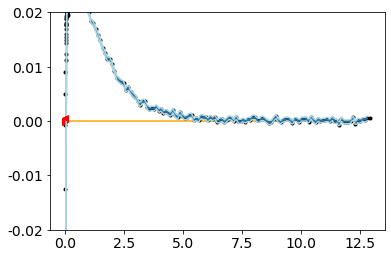

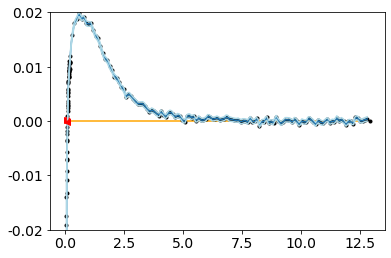

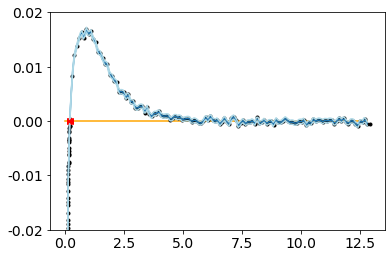

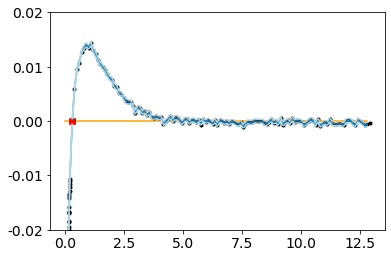

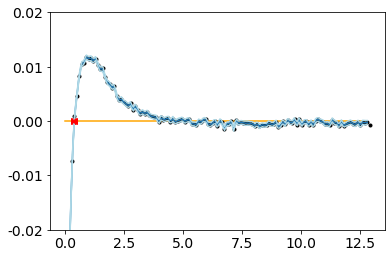

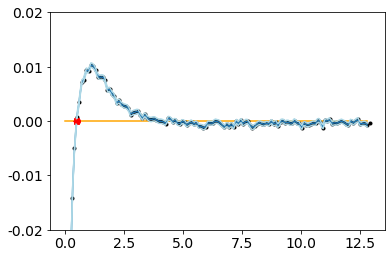

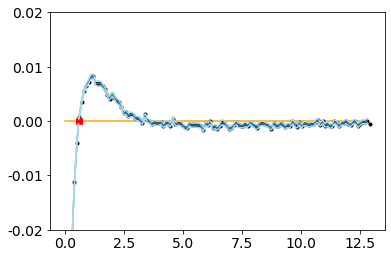

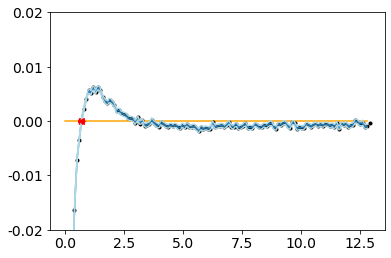

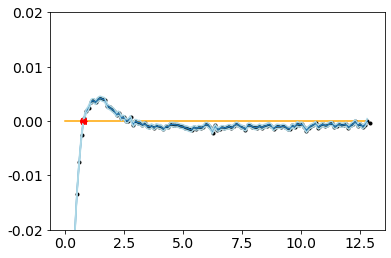

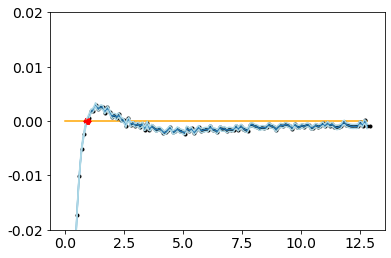

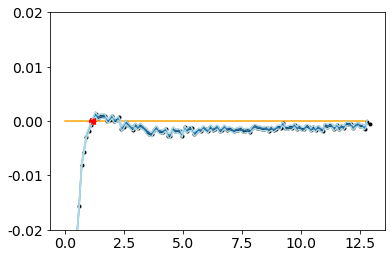

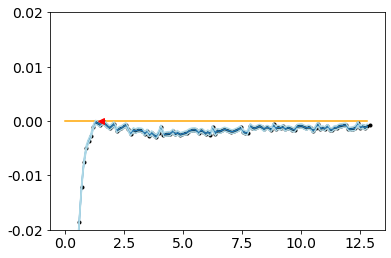

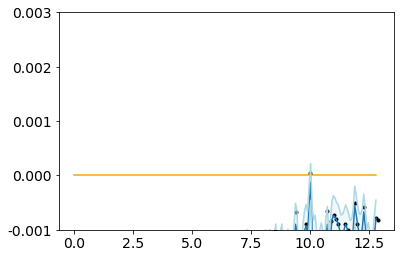

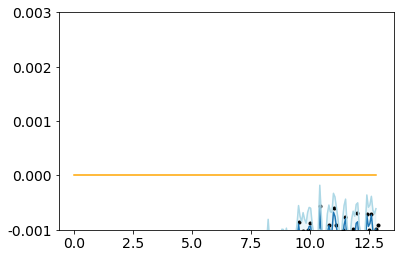

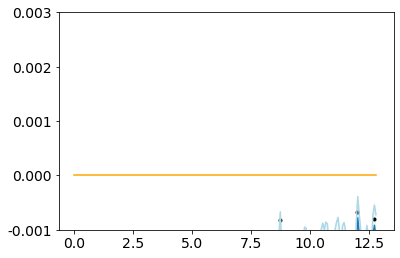

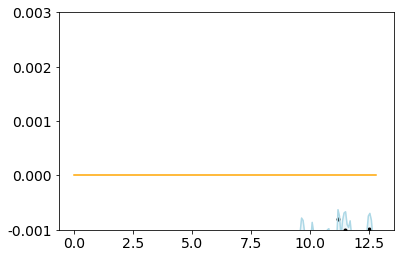

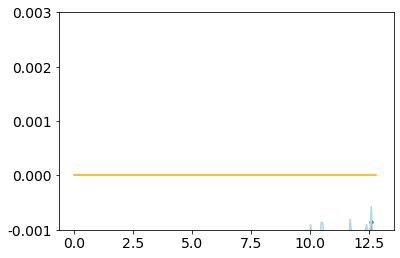

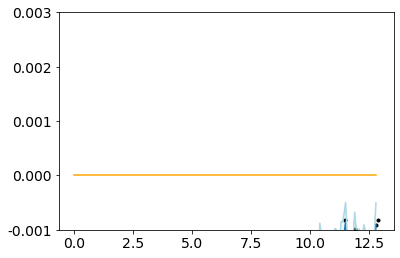

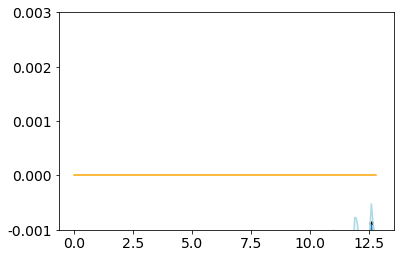

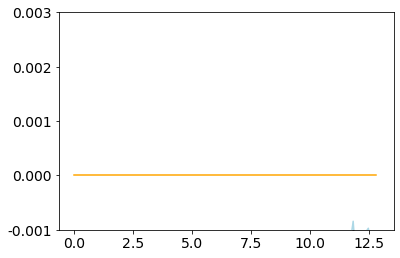

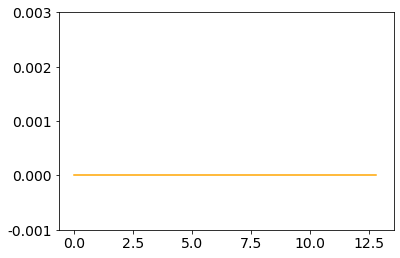

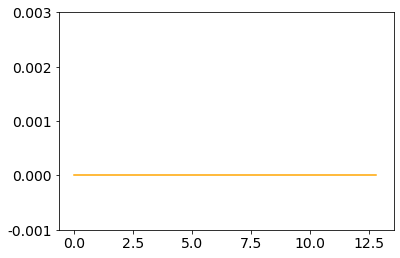

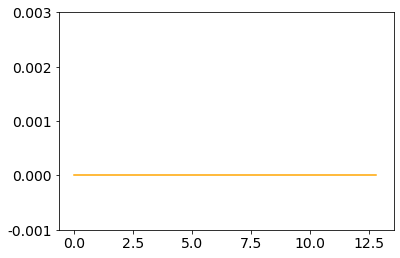

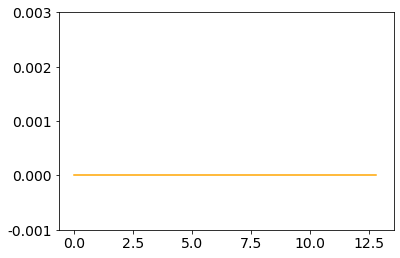

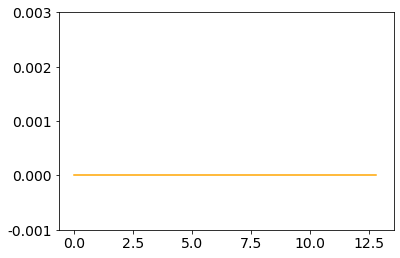

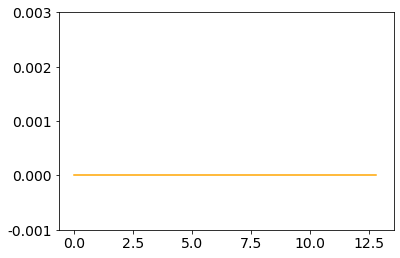

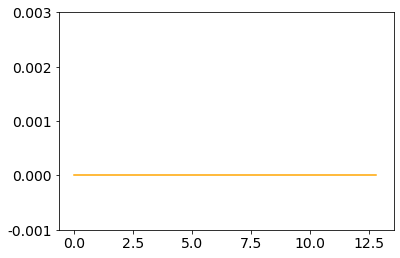

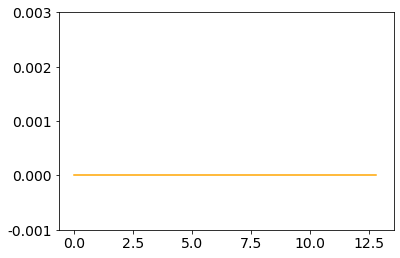

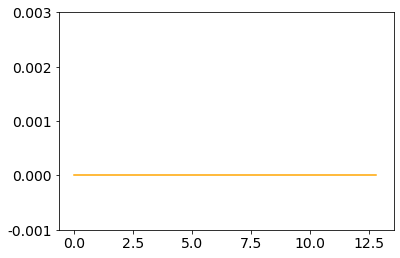

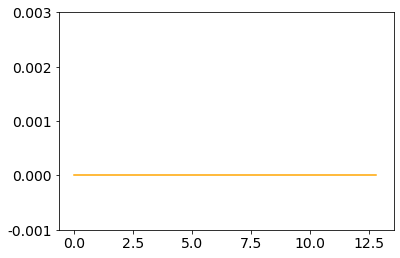

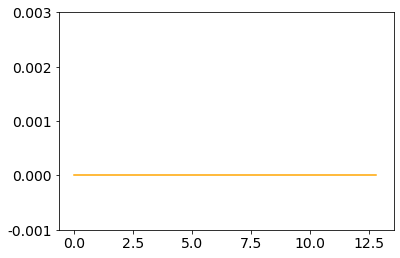

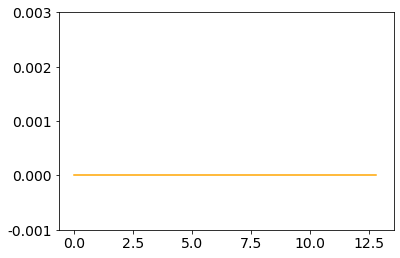

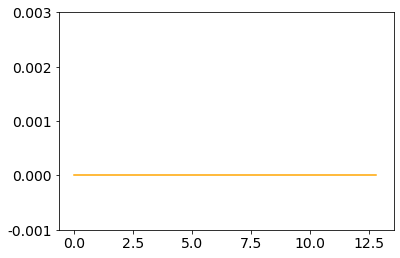

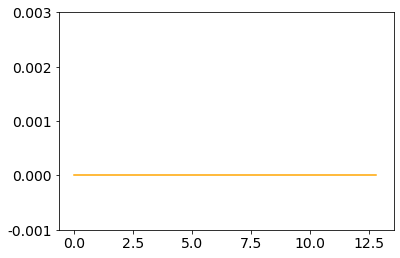

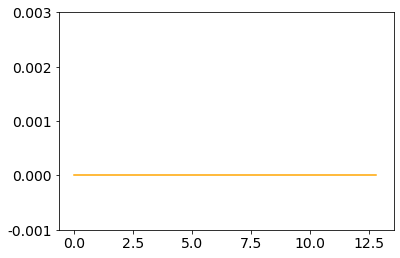

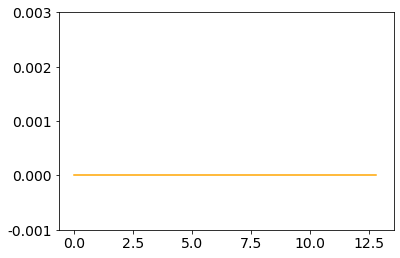

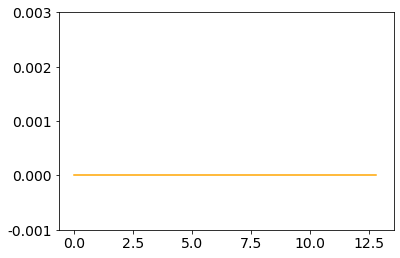

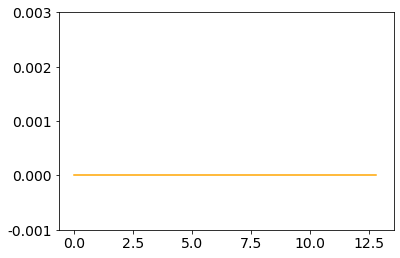

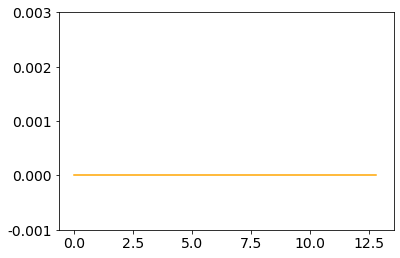

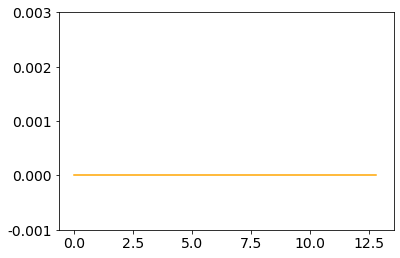

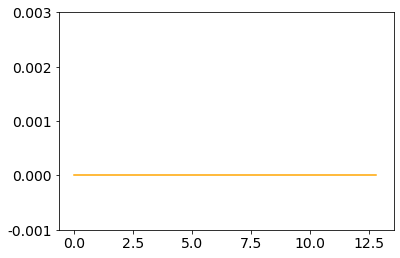

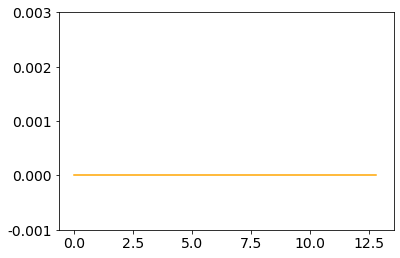

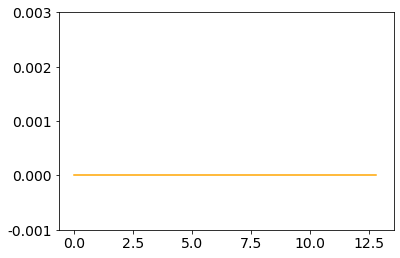

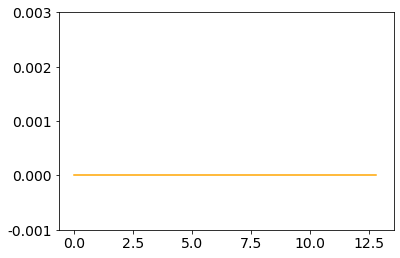

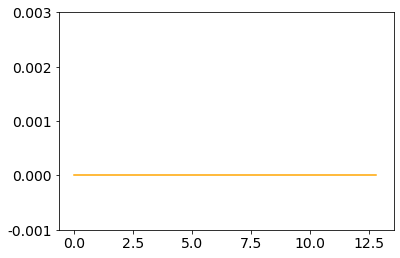

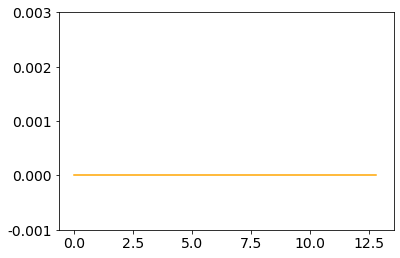

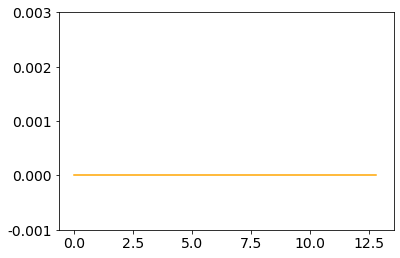

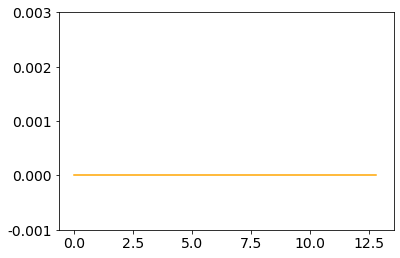

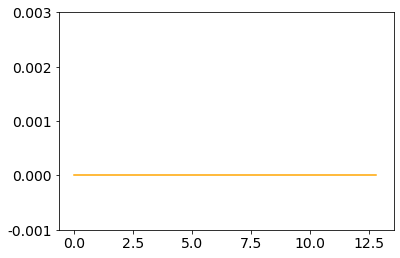

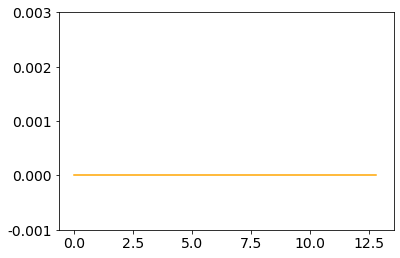

In [19]:
### 1 - c2 vs c3|| - low temperature crossing

crossing_lowT_c2c3par = []
J2_lowT = []
failedcrossing_lowT_c2c3par = []
crossing_lowT_c2c3parMin = []
J2_lowT_Min = []
failedcrossing_lowT_c2c3parMin = []
crossing_lowT_c2c3parMax = []
J2_lowT_Max = []
failedcrossing_lowT_c2c3parMax = []

for i in range(n):
    Diffc2c3par = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], kind = 'linear')
    Diffc2c3parMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
    Diffc2c3parMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 200)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], 'k.',
                     xnew, Diffc2c3par(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.005, 1.6]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3par.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3par(round(solution.root, 3)), 'o', color = "red")
        J2_lowT.append(J2[i])
    except:
        failedcrossing_lowT_c2c3par.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3parMin.append(round(solution.root, 3))
        J2_lowT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_lowT_c2c3parMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3parMax.append(round(solution.root, 3))
        J2_lowT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_lowT_c2c3parMax.append(J2[i])
        countfail +=1
    if countfail == 3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')



In [20]:
print(failedcrossing_lowT_c2c3par)

[0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]


In [21]:
print("J2_lowT_c2c3par = ", J2_lowT)
print("lowT_c2c3par = ", crossing_lowT_c2c3par)
print("J2_lowT_c2c3parMin =", J2_lowT_Min)
print("lowT_c2c3parMin =", crossing_lowT_c2c3parMin)
print("J2_lowT_c2c3parMax =", J2_lowT_Max)
print("lowT_c2c3parMax = ", crossing_lowT_c2c3parMax)

J2_lowT_c2c3par =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
lowT_c2c3par =  [0.01, 0.098, 0.199, 0.301, 0.387, 0.485, 0.581, 0.69, 0.78, 0.92, 1.154]
J2_lowT_c2c3parMin = [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
lowT_c2c3parMin = [0.01, 0.099, 0.203, 0.309, 0.392, 0.492, 0.589, 0.704, 0.793, 0.97, 1.186]
J2_lowT_c2c3parMax = [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011]
lowT_c2c3parMax =  [0.01, 0.096, 0.192, 0.296, 0.383, 0.478, 0.573, 0.679, 0.765, 0.886, 1.122, 1.537]


In [22]:
print(len(J2_lowT), len(crossing_lowT_c2c3par), len(J2_lowT_Min))

11 11 11


/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


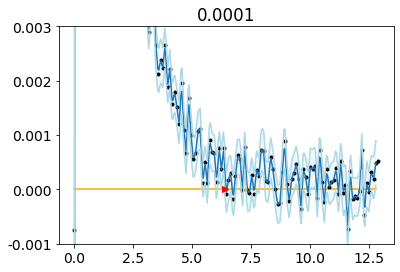

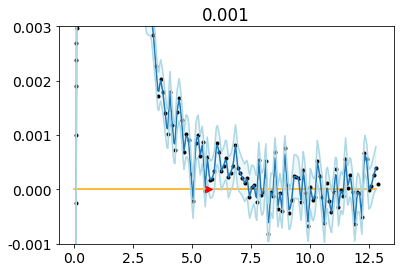

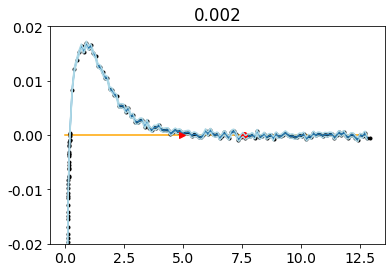

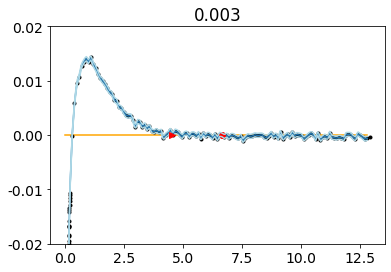

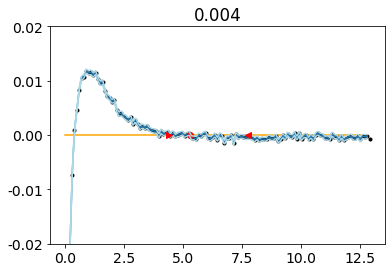

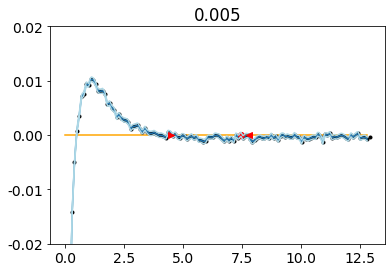

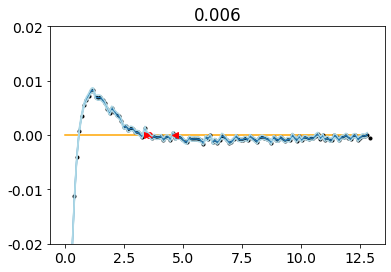

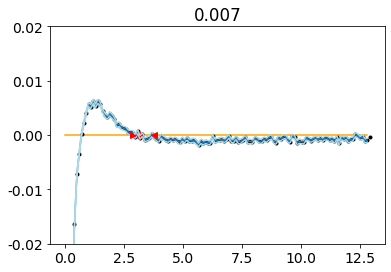

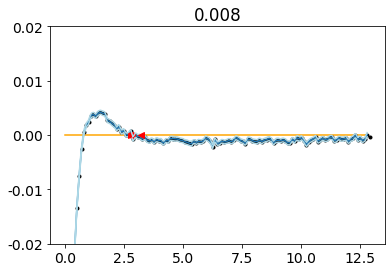

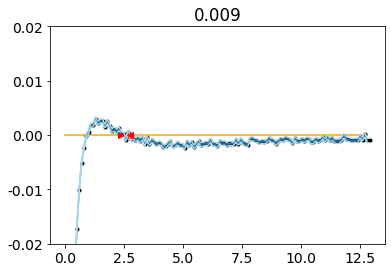

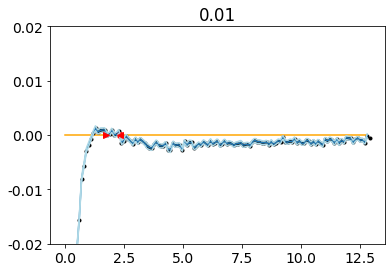

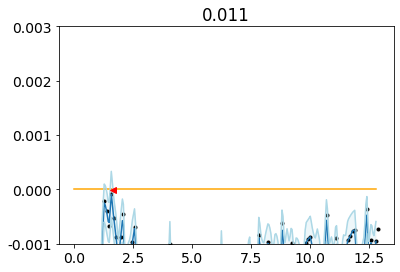

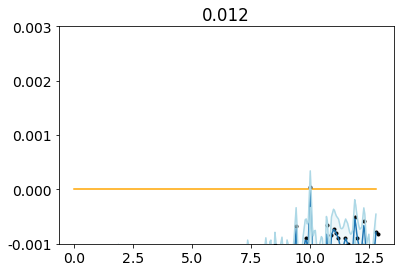

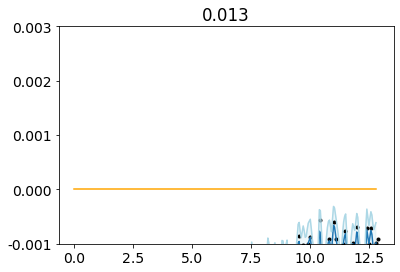

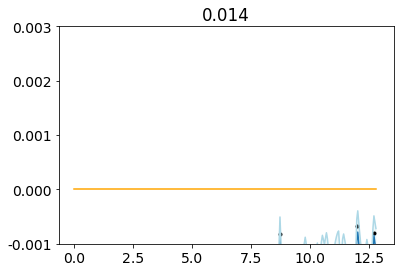

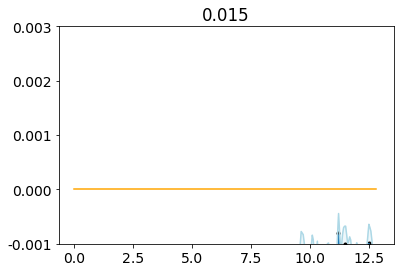

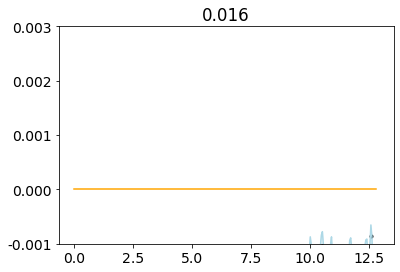

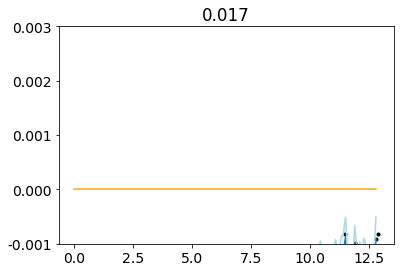

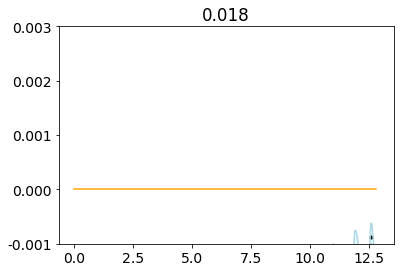

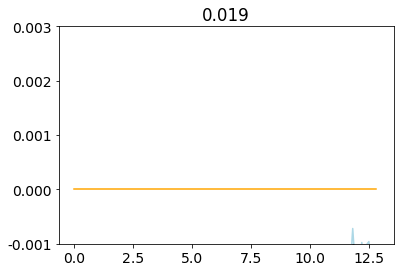

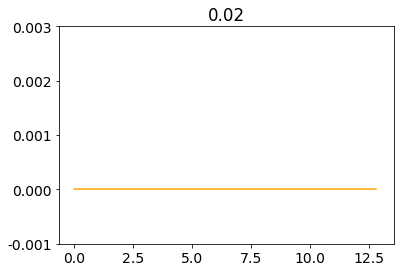

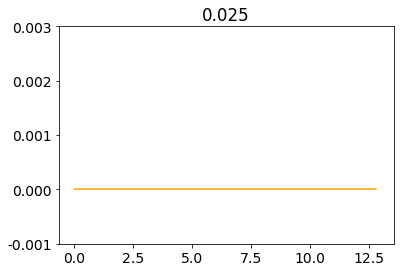

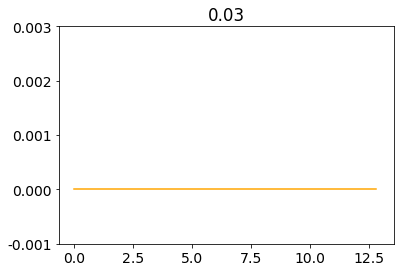

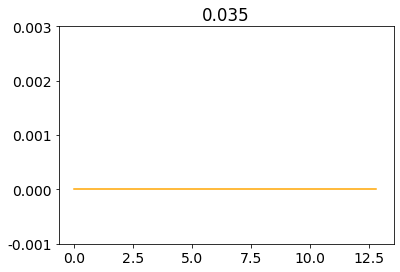

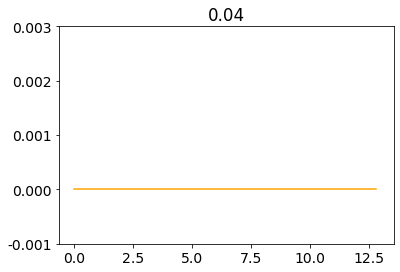

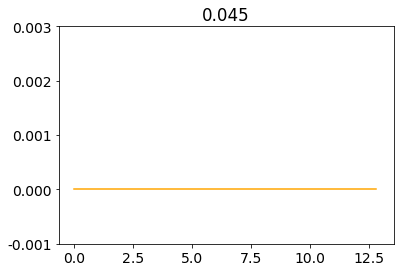

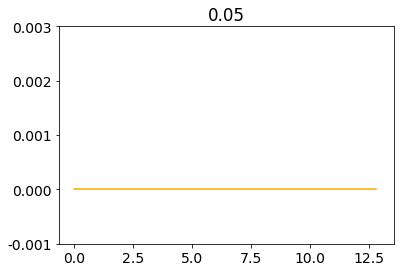

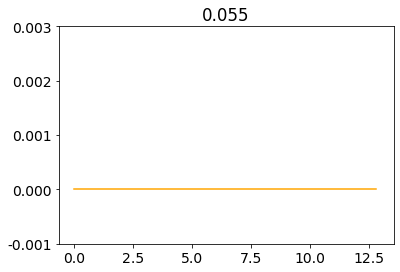

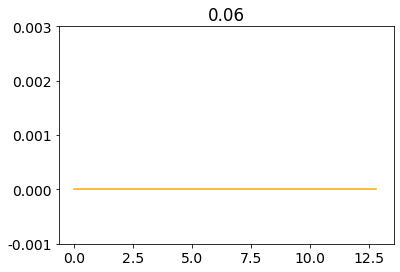

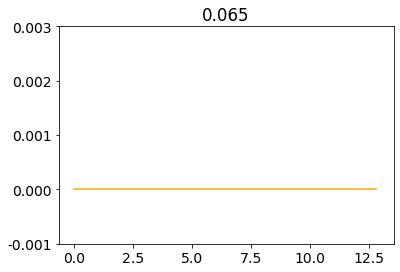

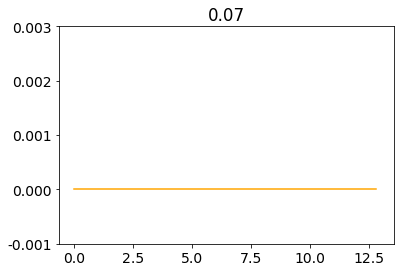

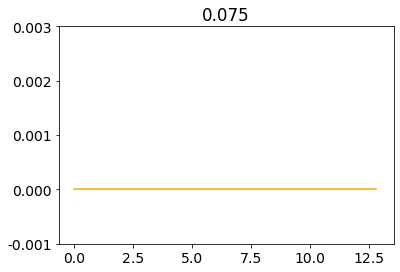

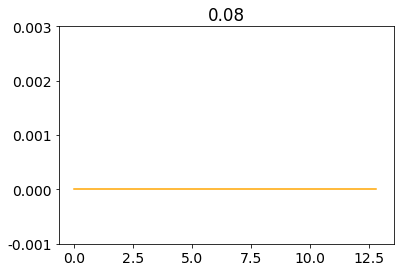

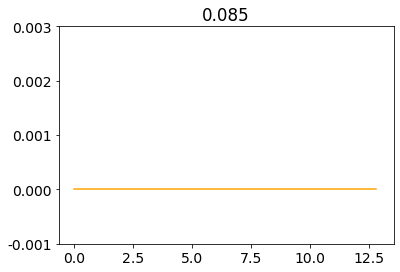

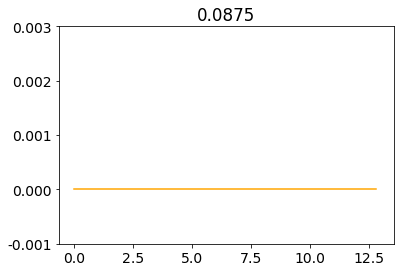

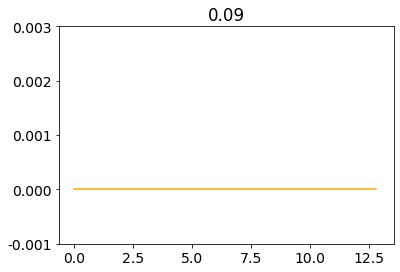

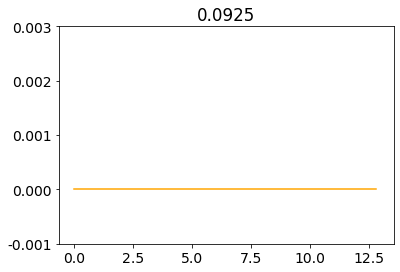

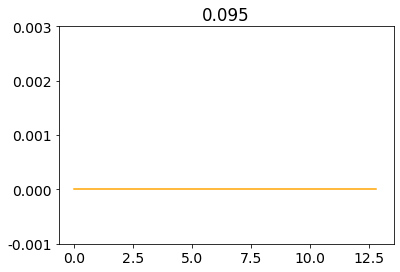

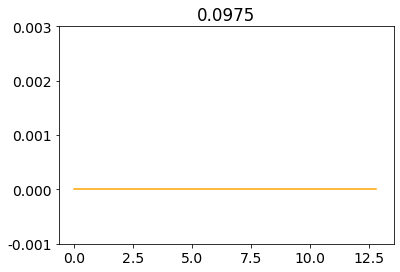

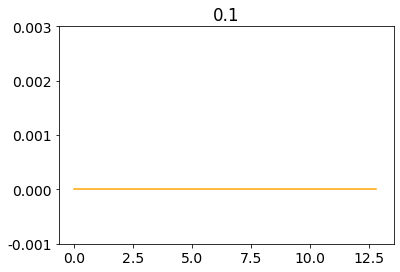

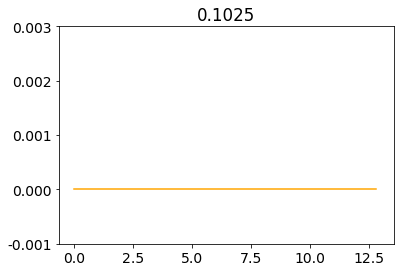

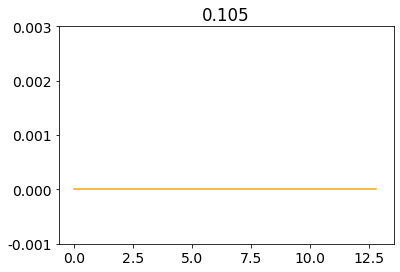

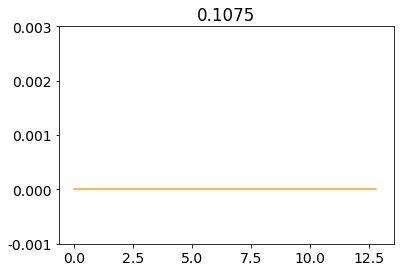

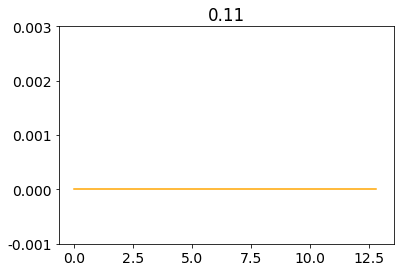

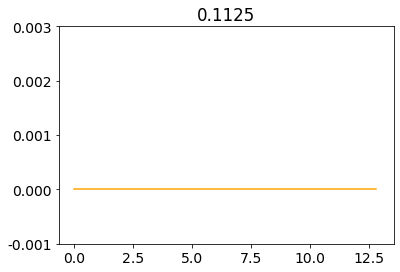

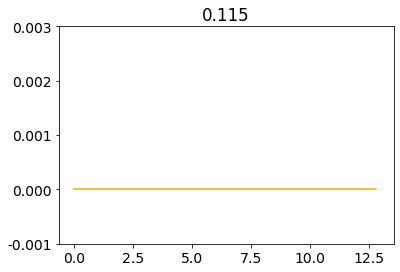

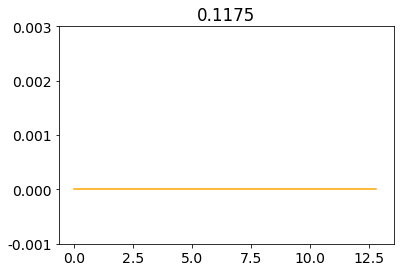

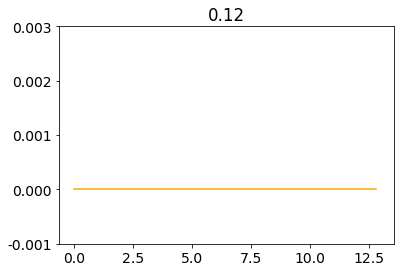

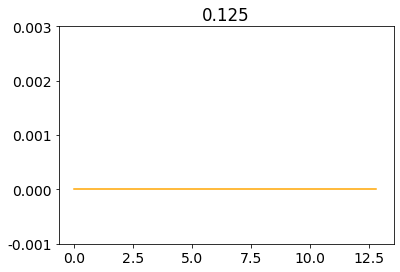

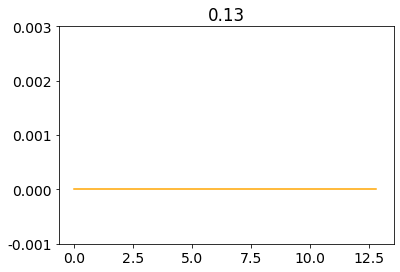

In [23]:
### 2 - c2 vs c3|| - high temperature crossing
crossing_highT_c2c3par = []
J2_highT = []
failedcrossing_highT_c2c3par = []
crossing_highT_c2c3parMin = []
J2_highT_Min = []
failedcrossing_highT_c2c3parMin = []
crossing_highT_c2c3parMax = []
J2_highT_Max = []
failedcrossing_highT_c2c3parMax = []

for i in range(n):
    Diffc2c3par = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], kind = 'linear')
    Diffc2c3parMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
    Diffc2c3parMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,2]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 300)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,2], 'k.',
                     xnew, Diffc2c3par(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [1.6, 7.8]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3par.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3par(round(solution.root, 3)), 'o', color = "red")
        J2_highT.append(J2[i])
    except:
        failedcrossing_highT_c2c3par.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3parMin.append(round(solution.root, 3))
        J2_highT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_highT_c2c3parMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3parMax.append(round(solution.root, 3))
        J2_highT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_highT_c2c3parMax.append(J2[i])
        countfail +=1
    if countfail >= 2:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
        
    plt.title(J2[i])
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')


In [24]:
print("J2_highT_c2c3par = ", J2_highT)
print("highT_c2c3par = ", crossing_highT_c2c3par)
print("J2_highT_c2c3parMin = ", J2_highT_Min)
print("highT_c2c3parMin = ", crossing_highT_c2c3parMin)
print("J2_highT_c2c3parMax = ", J2_highT_Max)
print("highT_c2c3parMax = ", crossing_highT_c2c3parMax)

J2_highT_c2c3par =  [0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
highT_c2c3par =  [7.562, 6.662, 5.298, 7.47, 3.555, 3.135, 2.825, 2.728, 2.317]
J2_highT_c2c3parMin =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
highT_c2c3parMin =  [6.398, 5.711, 4.949, 4.534, 4.392, 4.481, 3.459, 2.873, 2.801, 2.368, 1.745]
J2_highT_c2c3parMax =  [0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011]
highT_c2c3parMax =  [7.753, 7.783, 4.64, 3.768, 3.202, 2.757, 2.336, 1.658]


In [25]:
J2_lowT

[0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


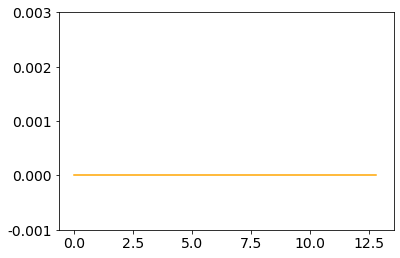

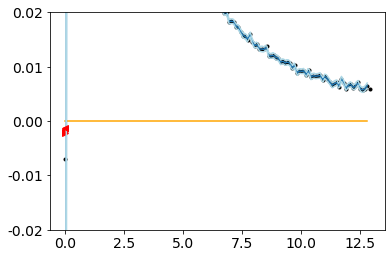

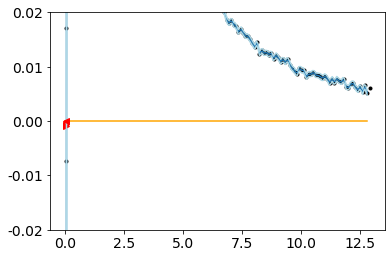

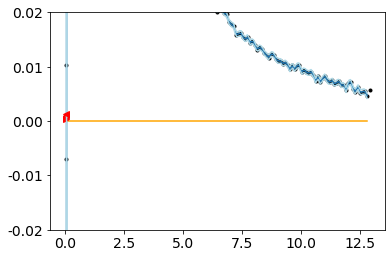

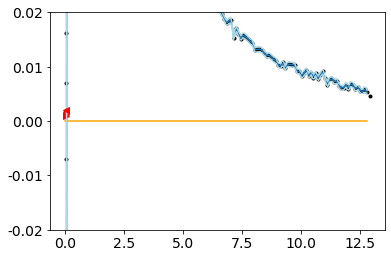

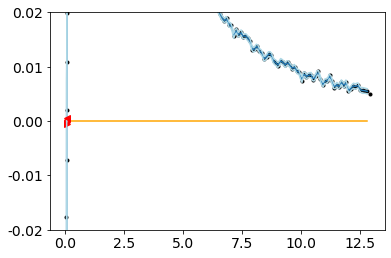

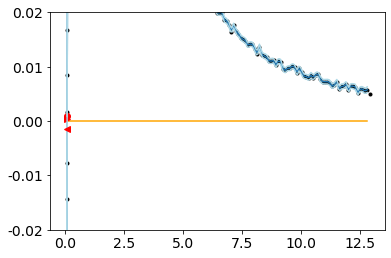

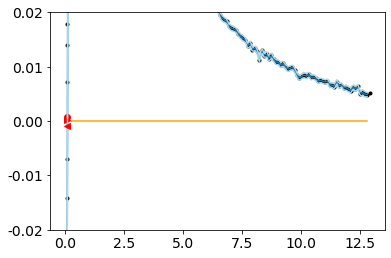

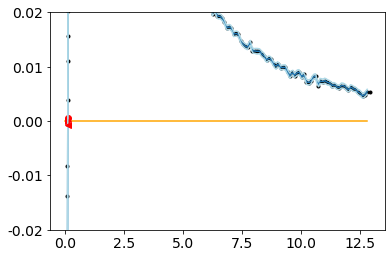

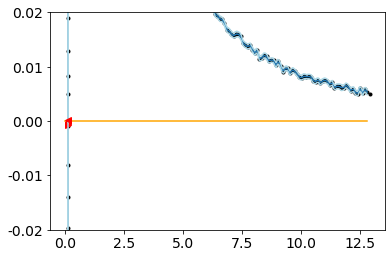

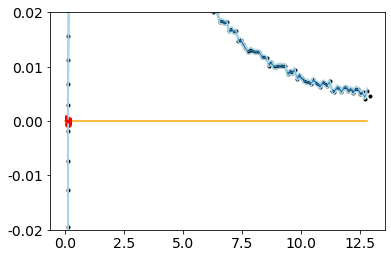

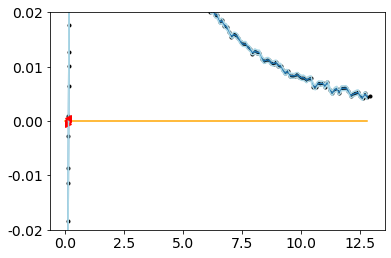

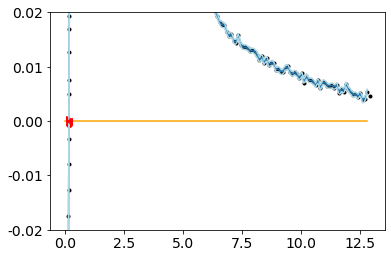

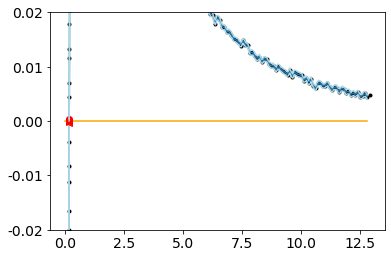

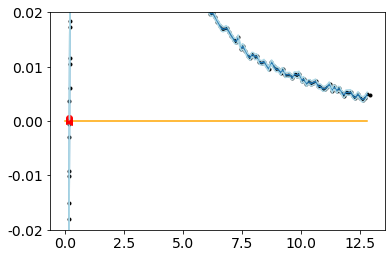

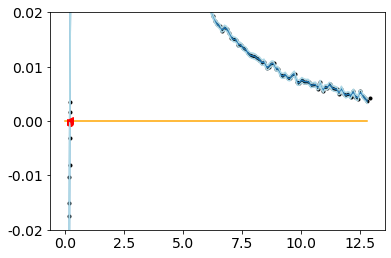

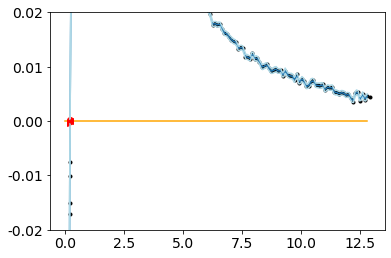

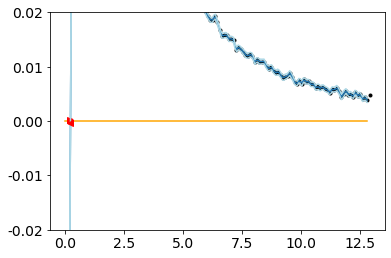

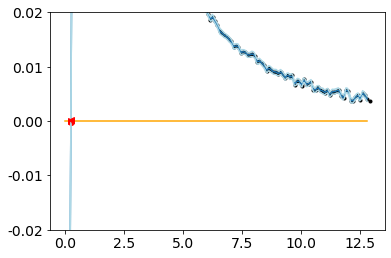

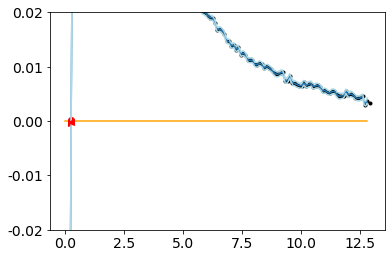

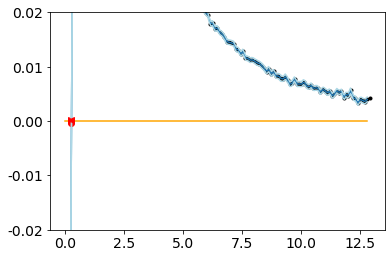

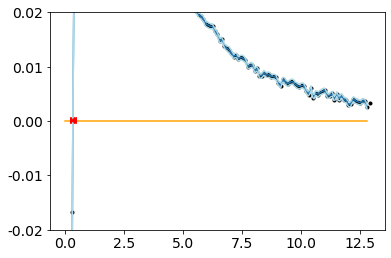

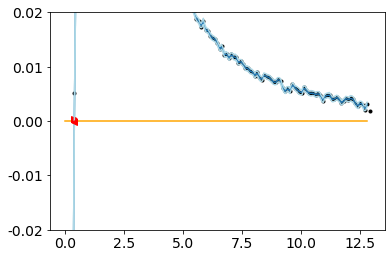

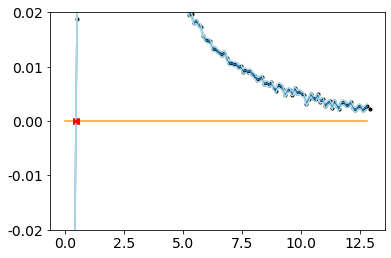

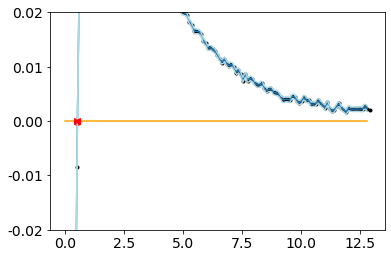

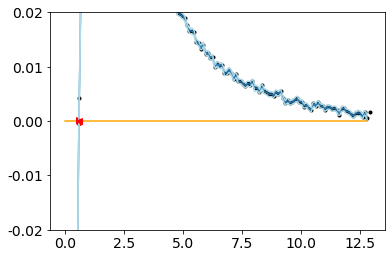

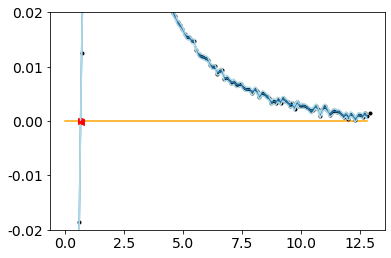

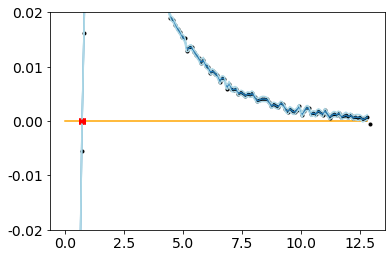

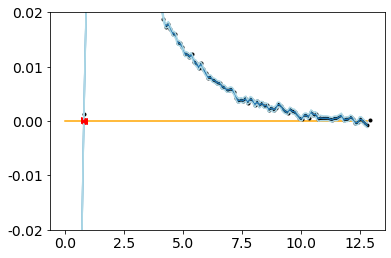

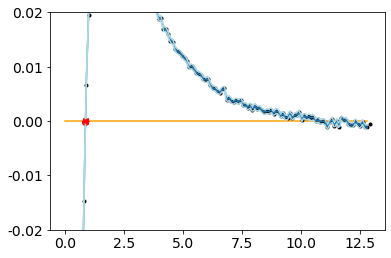

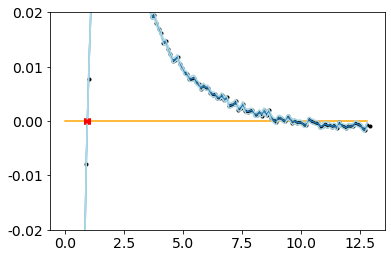

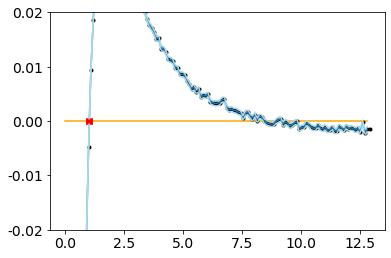

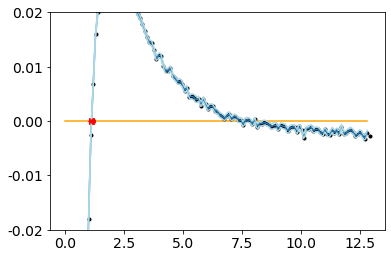

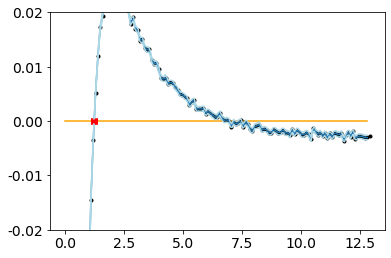

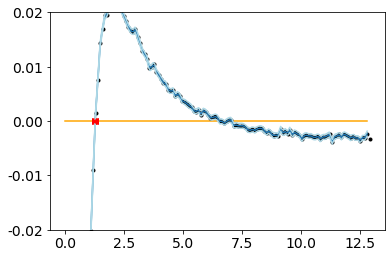

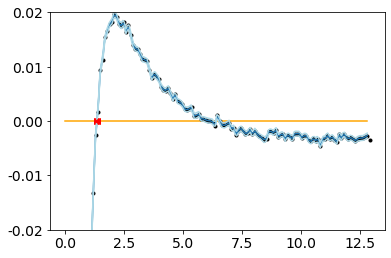

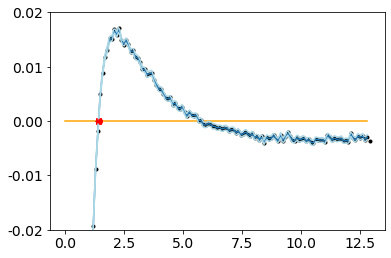

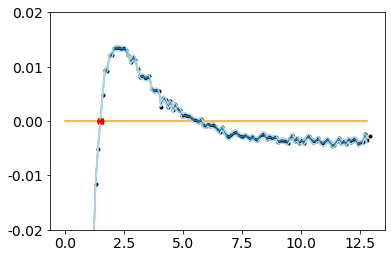

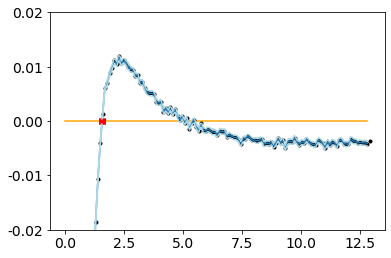

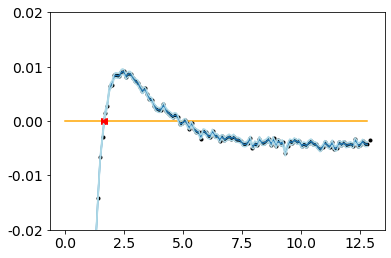

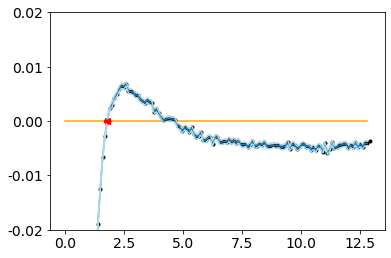

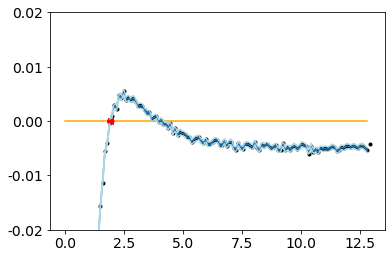

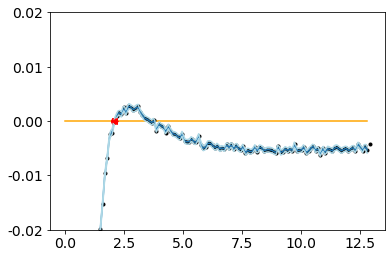

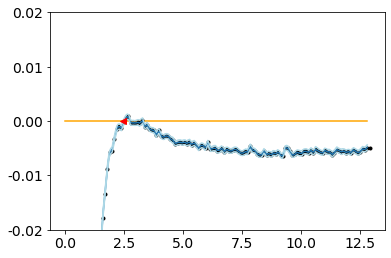

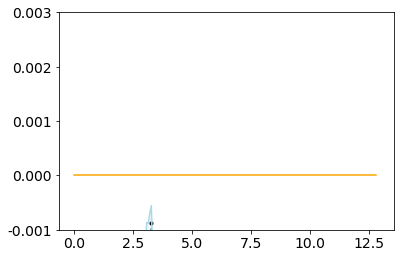

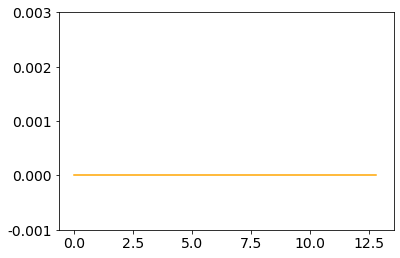

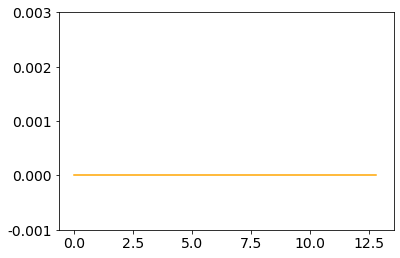

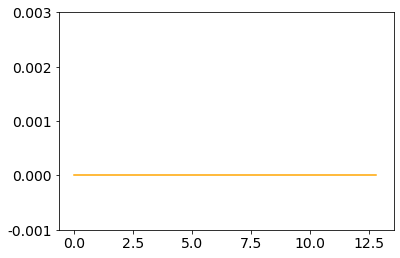

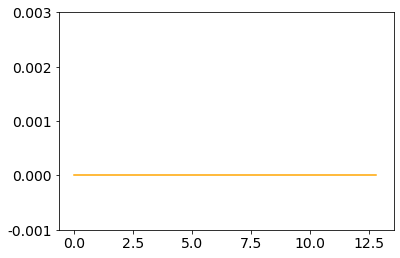

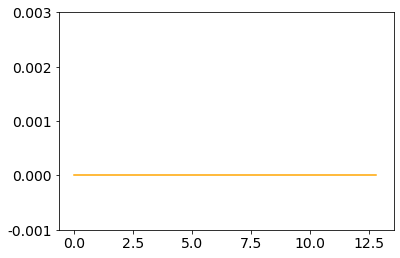

In [26]:
### 3 - c2 vs c3* - low temperature crossing

crossing_lowT_c2c3star = []
J2_lowT = []
failedcrossing_lowT_c2c3star = []
crossing_lowT_c2c3starMin = []
J2_lowT_Min = []
failedcrossing_lowT_c2c3starMin = []
crossing_lowT_c2c3starMax = []
J2_lowT_Max = []
failedcrossing_lowT_c2c3starMax = []

for i in range(n):
    Diffc2c3star = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], kind = 'linear')
    Diffc2c3starMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
    Diffc2c3starMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 200)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], 'k.',
                     xnew, Diffc2c3star(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3starMin(xnew),Diffc2c3starMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.005, 2.5]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3star.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3star(round(solution.root, 3)), 'o', color = "red")
        J2_lowT.append(J2[i])
    except:
        failedcrossing_lowT_c2c3star.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3starMin.append(round(solution.root, 3))
        J2_lowT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_lowT_c2c3starMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_lowT_c2c3starMax.append(round(solution.root, 3))
        J2_lowT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_lowT_c2c3starMax.append(J2[i])
        countfail +=1
    if countfail == 3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')



In [27]:
print("J2_lowT_c2c3star = ", J2_lowT)
print("lowT_c2c3star = ", crossing_lowT_c2c3star)
print("J2_lowT_c2c3starMin = ", J2_lowT_Min)
print("lowT_c2c3starMin = ", crossing_lowT_c2c3starMin)
print("J2_lowT_c2c3starMax = ", J2_lowT_Max)
print("lowT_c2c3starMax = ", crossing_lowT_c2c3starMax)

J2_lowT_c2c3star =  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075]
lowT_c2c3star =  [0.013, 0.026, 0.039, 0.052, 0.065, 0.078, 0.091, 0.104, 0.116, 0.129, 0.143, 0.156, 0.169, 0.182, 0.194, 0.211, 0.228, 0.243, 0.257, 0.269, 0.33, 0.391, 0.459, 0.522, 0.586, 0.656, 0.721, 0.791, 0.863, 0.944, 1.027, 1.12, 1.232, 1.278, 1.351, 1.418, 1.492, 1.566, 1.655, 1.789, 1.909, 2.089]
J2_lowT_c2c3starMin =  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075]
lowT_c2c3starMin =  [0.013, 0.026, 0.039, 0.052, 0.065, 0.078, 0.091,

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


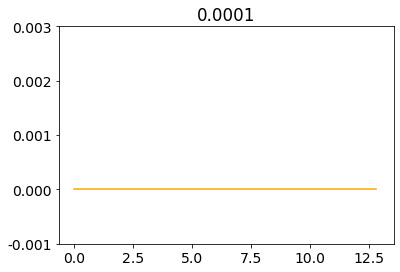

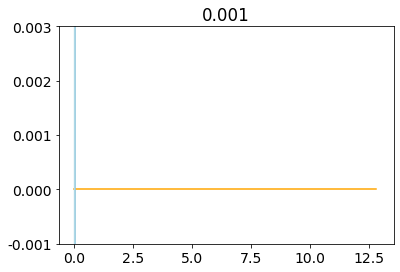

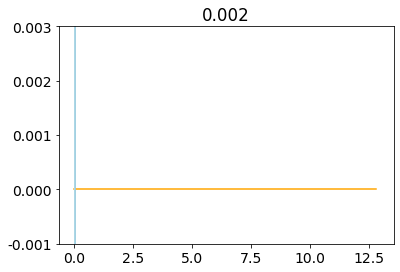

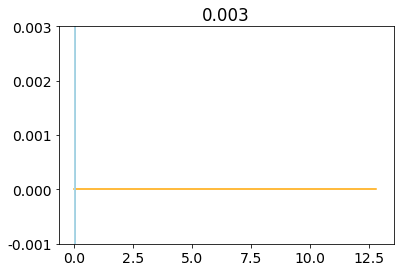

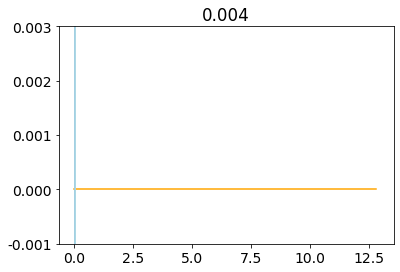

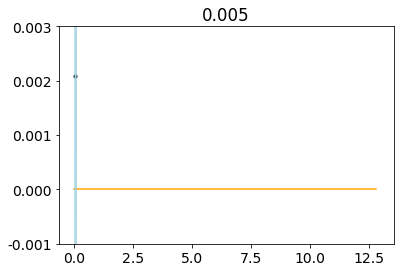

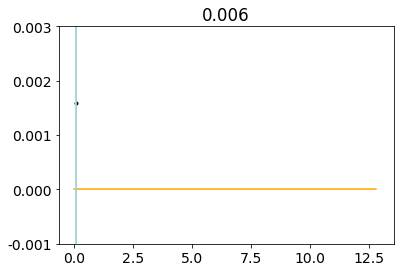

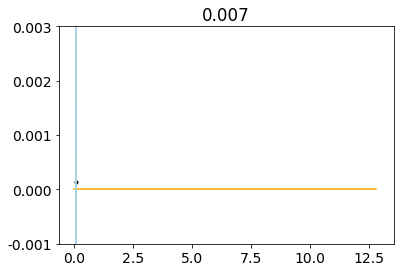

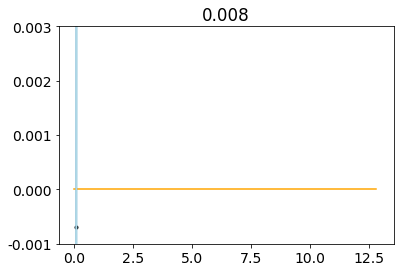

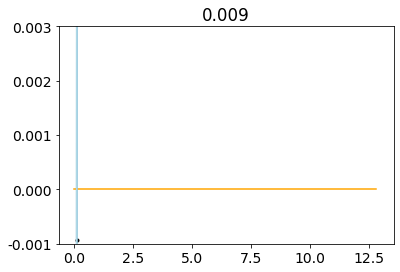

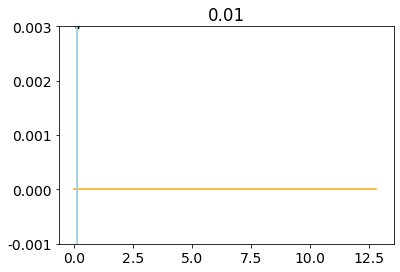

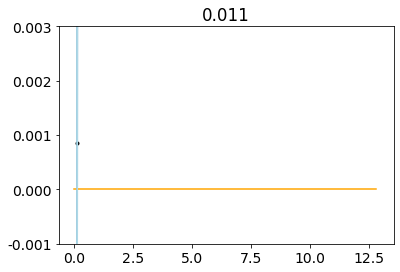

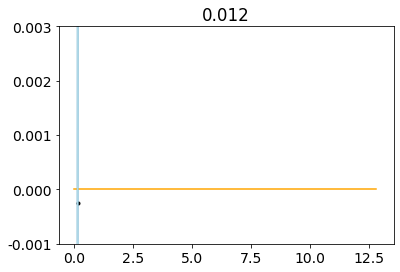

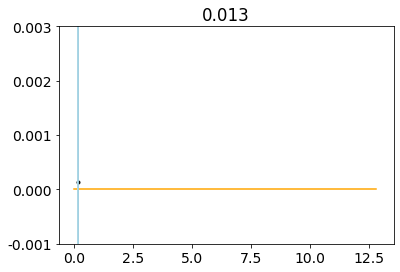

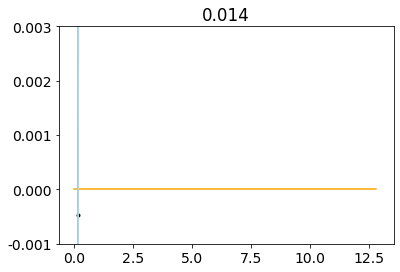

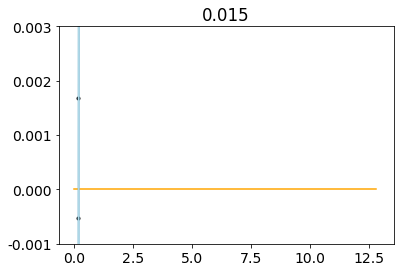

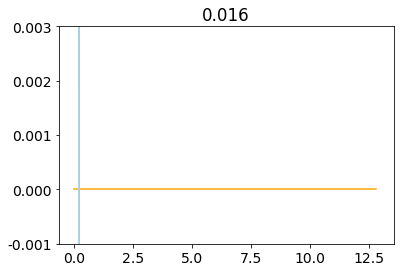

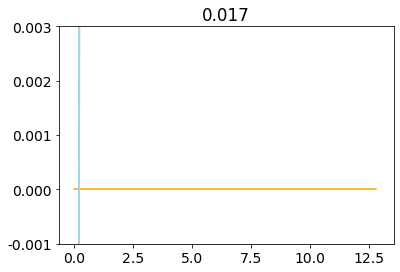

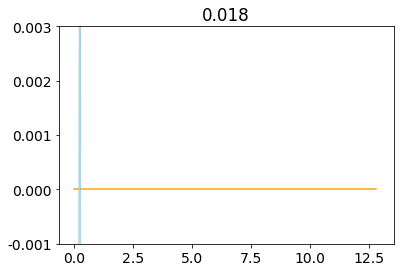

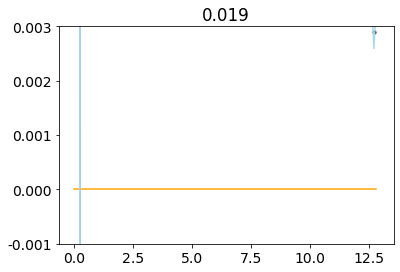

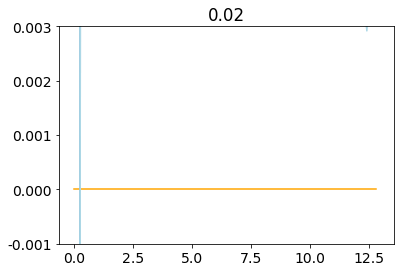

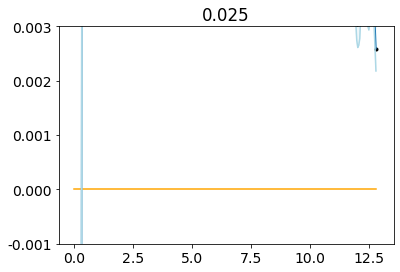

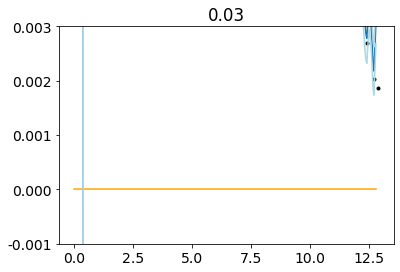

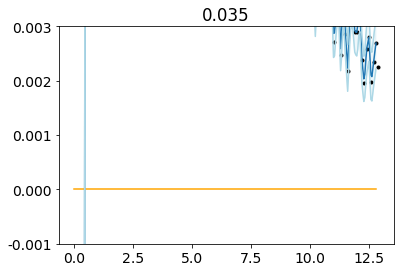

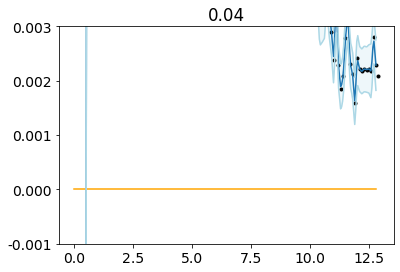

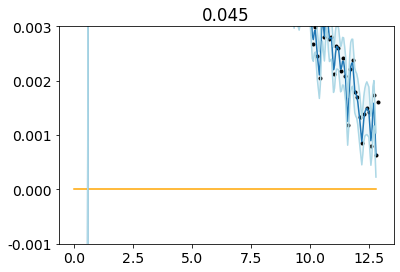

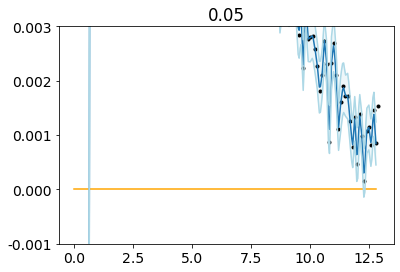

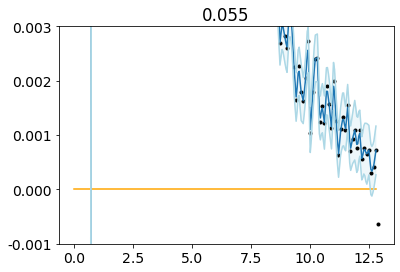

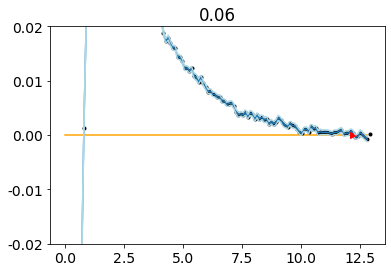

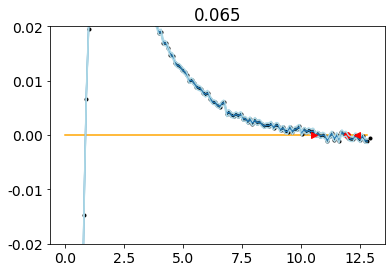

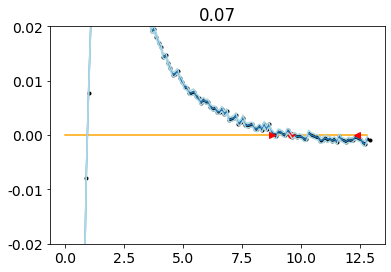

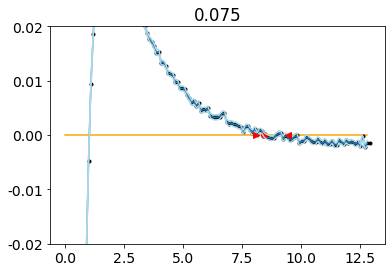

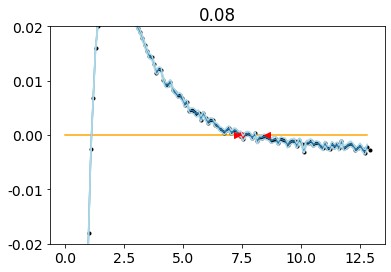

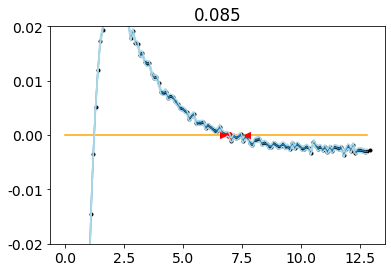

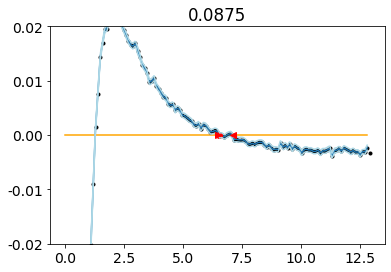

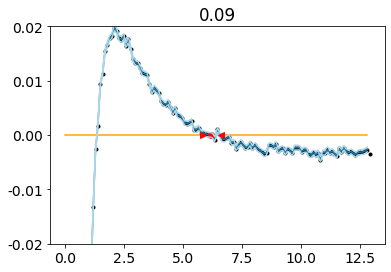

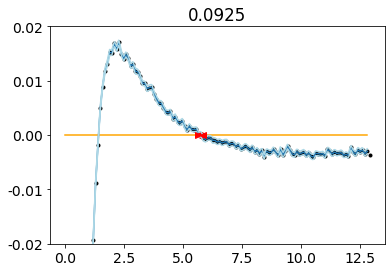

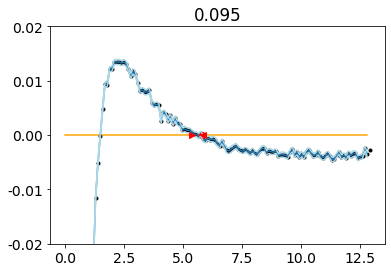

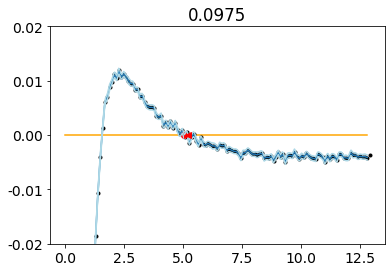

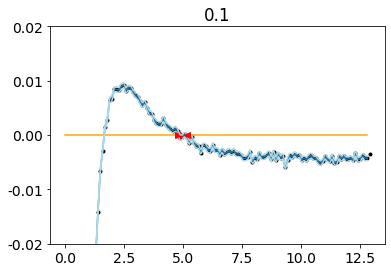

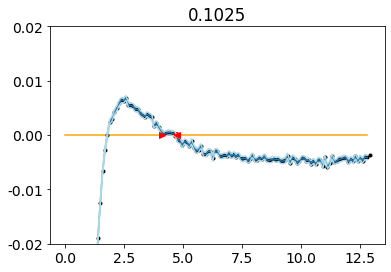

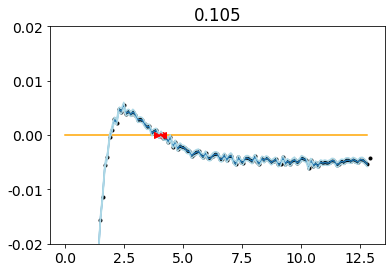

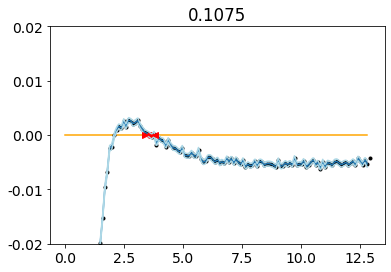

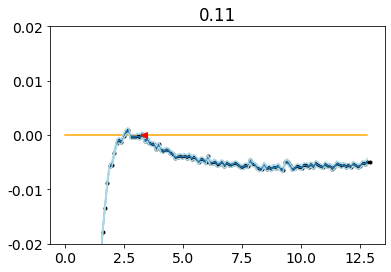

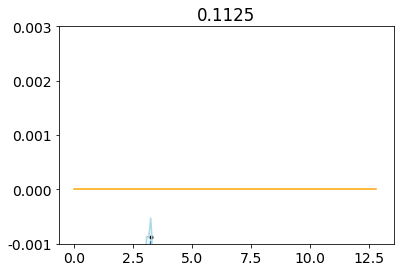

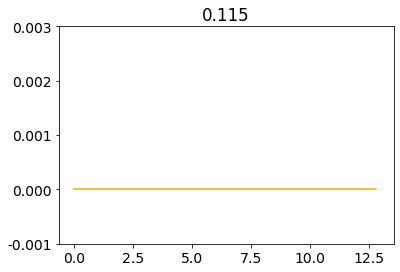

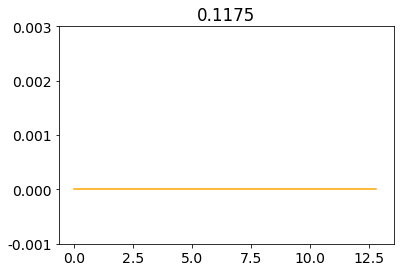

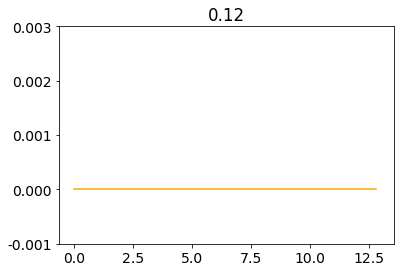

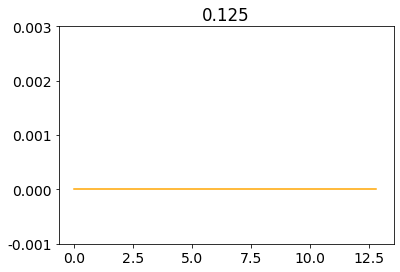

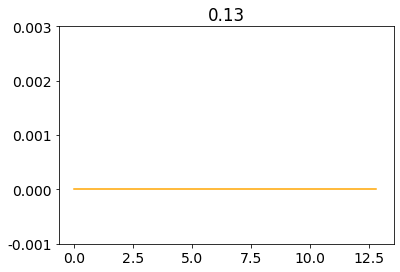

In [28]:
### 4 - c2 vs c3* - high temperature crossing
crossing_highT_c2c3star = []
J2_highT = []
failedcrossing_highT_c2c3star = []
crossing_highT_c2c3starMin = []
J2_highT_Min = []
failedcrossing_highT_c2c3starMin = []
crossing_highT_c2c3starMax = []
J2_highT_Max = []
failedcrossing_highT_c2c3starMax = []

for i in range(n):
    Diffc2c3star = interp1d(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], kind = 'linear')
    Diffc2c3starMin = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]-np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
    Diffc2c3starMax = interp1d(temperatures_plots[i], 
                           t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3]+np.sqrt(t_h_varMeanFc[i][:,0,1]+t_h_varMeanFc[i][:,0,3]), kind = 'linear')
   
    xnew = np.linspace(temperatures_plots[i][0], temperatures_plots[i][190], 300)
    
    plt.figure()
    plt.plot([temperatures_plots[i][0],temperatures_plots[i][190]], [0, 0], color = 'orange')
    plt.plot(temperatures_plots[i], t_h_MeanFc[i][:,0,1]-t_h_MeanFc[i][:,0,3], 'k.',
                     xnew, Diffc2c3star(xnew), '-')
    
    plt.fill_between(xnew, Diffc2c3starMin(xnew),Diffc2c3starMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [2.5, 12.5]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3star.append(round(solution.root, 3))
        plt.plot(solution.root, Diffc2c3star(round(solution.root, 3)), 'o', color = "red")
        J2_highT.append(J2[i])
    except:
        failedcrossing_highT_c2c3star.append(J2[i])
        countfail +=1
    #min:
    plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3starMin.append(round(solution.root, 3))
        J2_highT_Min.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        failedcrossing_highT_c2c3starMin.append(J2[i])
        countfail +=1
        
    #max:
    plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_highT_c2c3starMax.append(round(solution.root, 3))
        J2_highT_Max.append(J2[i])
        plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        failedcrossing_highT_c2c3starMax.append(J2[i])
        countfail +=1
    if countfail ==3:
        plt.ylim([-0.001, 0.003])
    else:
        plt.ylim([-0.02, 0.02])
        
    plt.title(J2[i])
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')


In [29]:
print("J2_highT_c2c3star = ", J2_highT)
print("highT_c2c3star = ", crossing_highT_c2c3star)
print("J2_highT_c2c3starMin = ", J2_highT_Min)
print("highT_c2c3starMin = ", crossing_highT_c2c3starMin)
print("J2_highT_c2c3starMax = ", J2_highT_Max)
print("highT_c2c3starMax = ", crossing_highT_c2c3starMax)

J2_highT_c2c3star =  [0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075]
highT_c2c3star =  [11.94, 9.588, 8.44, 7.472, 6.952, 6.54, 6.184, 5.778, 5.786, 5.029, 4.825, 4.681, 4.104, 3.587]
J2_highT_c2c3starMin =  [0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075]
highT_c2c3starMin =  [12.194, 10.556, 8.759, 8.099, 7.3, 6.683, 6.475, 5.862, 5.622, 5.387, 5.168, 4.79, 4.121, 3.912, 3.39]
J2_highT_c2c3starMax =  [0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11]
highT_c2c3starMax =  [12.381, 12.352, 9.45, 8.539, 7.715, 7.109, 6.606, 5.842, 5.832, 5.21, 5.168, 4.722, 4.166, 3.806, 3.325]


In [30]:
#######################################################################
#     Temperature crossing points as a function of J2  - vs exp       #
#######################################################################

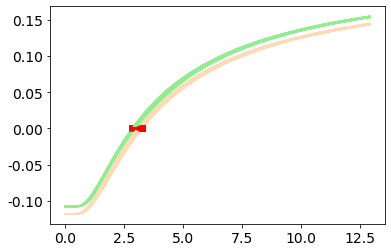

In [31]:
### 7 - c1 vs expc1 - J2 crossing

J2c1expc1 = []

TMin_c1expc1 = []
TMax_c1expc1 = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,0]-(NN1exp-NN1experr)
    Diff2Max = t_h_MeanFc[i][:,0,0]-(NN1exp+NN1experr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c1expc1.append(round(J2[i], 4))
        
        Diffc1expc1Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,0]-(NN1exp-NN1experr), kind = 'linear')
        Diffc1expc1Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,0]-(NN1exp+NN1experr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004, 8]
        #min:
        plt.plot(xnew, Diffc1expc1Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc1expc1Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Min(round(solution.root, 3)), '>', color = "red")
        except:
            TMin_c1expc1.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc1expc1Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc1expc1Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Max(round(solution.root, 3)), '<', color = "red")
        except:
            TMax_c1expc1.append(round(max(temperatures_plots[i][:]), 6))

In [32]:
print("J2c1expc1 = ", J2c1expc1)
print("TMin_c1expc1= ",TMin_c1expc1)
print("TMax_c1expc1= ",TMax_c1expc1)

J2c1expc1 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
TMin_c1expc1=  [3.016996, 3.02055, 3.01614, 3.014338, 3.016045, 3.013826, 3.011109, 3.011187, 3.009359, 3.008734, 3.002716, 3.002408, 2.998094, 3.00326, 3.001116, 3.000125, 2.996835, 2.995134, 2.996016, 2.998831, 2.989765, 2.978075, 2.972398, 2.963563, 2.955615, 2.952615, 2.946887, 2.939763, 2.934884, 2.920766, 2.92081, 2.913623, 2.90657, 2.89414, 2.888934, 2.886811, 2.884961, 2.880019, 2.87801, 2.869221, 2.868627, 2.866173, 2.863726, 2.8628, 2.857295, 2.852848, 2.850437, 2.843724, 2.841522, 2.8358]
TMax_c1expc1=  [3.258083, 3.254994, 3.254971, 3.24667, 3.249643, 3.245555, 3.245746, 3.251344, 3.243387, 3.245432, 3.239789, 3.241054, 3.

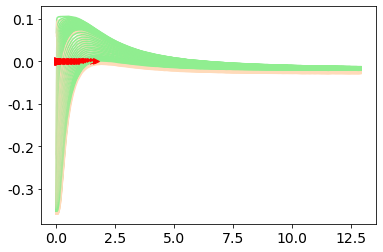

In [33]:
### 7 - c2 vs expc2 - J2 crossing

J2c2expc2 = []

TMin_c2expc2 = []
TMax_c2expc2 = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,1]-(NN2exp-NN2experr)
    Diff2Max = t_h_MeanFc[i][:,0,1]-(NN2exp+NN2experr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c2expc2.append(round(J2[i], 4))
        
        Diffc2expc2Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp-NN2experr), kind = 'linear')
        Diffc2expc2Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp+NN2experr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,2]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 3)), '>', color = "red")
        except:
            TMin_c2expc2.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 3)), '<', color = "red")
        except:
            TMax_c2expc2.append(round(max(temperatures_plots[i][:]), 6))

In [34]:
print("J2c2expc2 = ", J2c2expc2)
print("TMin_c2expc2= ",TMin_c2expc2)
print("TMax_c2expc2= ",TMax_c2expc2)

J2c2expc2 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105]
TMin_c2expc2=  [0.00325, 0.011734, 0.023096, 0.034479, 0.046089, 0.057474, 0.069077, 0.080581, 0.09209, 0.103784, 0.114713, 0.126539, 0.138371, 0.150186, 0.161, 0.173085, 0.183983, 0.196216, 0.211298, 0.226264, 0.240205, 0.290552, 0.352477, 0.405176, 0.46591, 0.522236, 0.580234, 0.638652, 0.698452, 0.763875, 0.83146, 0.896448, 0.976713, 1.065465, 1.106793, 1.157515, 1.216715, 1.264489, 1.3583, 1.423756, 1.55655, 1.682077]
TMax_c2expc2=  [12.9, 0.012533, 0.025051, 0.037462, 0.049877, 0.06233, 0.075129, 0.087277, 0.100218, 0.112515, 0.124901, 0.137787, 0.149996, 0.162405, 0.175684, 0.187333, 0.199412, 0.217607, 0.233109, 0.24719, 0.260115, 0.314418, 0.379204, 0.442225, 0.500577, 0.567759, 0.

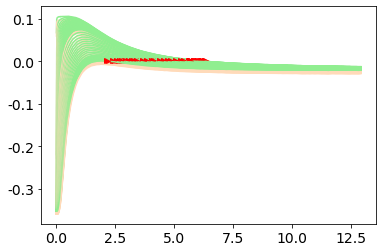

In [35]:
### 7 - c2 vs expc2 - J2 crossing

HT_J2c2expc2 = []

HT_TMin_c2expc2 = []
HT_TMax_c2expc2 = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,1]-(NN2exp-NN2experr)
    Diff2Max = t_h_MeanFc[i][:,0,1]-(NN2exp+NN2experr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Max>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        HT_J2c2expc2.append(round(J2[i], 4))
        
        Diffc2expc2Min = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp-NN2experr), kind = 'linear')
        Diffc2expc2Max = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,1]-(NN2exp+NN2experr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [1.9,12]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMax_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 3)), '>', color = "red")
        except:
            HT_TMax_c2expc2.append(round(max(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMin_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 3)), '<', color = "red")
        except:
            HT_TMin_c2expc2.append(round(min(temperatures_plots[i][:]), 6))

In [36]:
print(len(HT_J2c2expc2))
print(len(HT_TMin_c2expc2))
print(len(HT_TMax_c2expc2))

42
42
42


In [37]:
print("HT_J2c2expc2 = ", HT_J2c2expc2)
print("HT_TMin_c2expc2= ",HT_TMin_c2expc2)
print("HT_TMax_c2expc2= ",HT_TMax_c2expc2)

HT_J2c2expc2 =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105]
HT_TMin_c2expc2=  [4.989827, 4.964809, 4.942465, 4.929343, 4.944641, 4.87553, 4.870424, 4.818216, 4.839976, 4.784794, 4.756935, 4.718558, 4.698883, 4.668672, 4.628519, 4.66783, 4.599119, 4.581231, 4.520795, 4.483512, 4.452205, 4.354468, 4.186745, 4.052002, 3.964629, 3.750962, 3.600962, 3.445005, 3.314861, 3.173263, 3.006853, 2.843174, 2.649069, 2.429456, 2.32743, 2.195964, 1.972925, 0.00325, 0.00325, 0.00325, 0.00325, 0.00325]
HT_TMax_c2expc2=  [6.292553, 6.333872, 6.296981, 6.198651, 6.167592, 6.144052, 6.17048, 6.0043, 6.069667, 6.022185, 5.974707, 5.894516, 5.910202, 5.849912, 5.812123, 5.721309, 5.720182, 5.680308, 5.642258, 5.651067, 5.667149, 5.407066, 5.290686, 5.077535, 4.863148

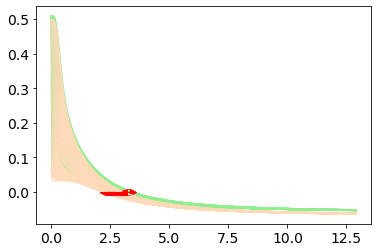

In [38]:
### 7 - c3par vs expc3par - J2 crossing

J2c3parexpc3par = []

TMin_c3parexpc3par = []
TMax_c3parexpc3par = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,2]-(NN3pexp-NN3pexperr)
    Diff2Max = t_h_MeanFc[i][:,0,2]-(NN3pexp+NN3pexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        J2c3parexpc3par.append(round(J2[i], 4))
        
        Diffc3parexpc3parMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,2]-(NN3pexp-NN3pexperr), kind = 'linear')
        Diffc3parexpc3parMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,2]-(NN3pexp+NN3pexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,12.5]
        #min:
        plt.plot(xnew, Diffc3parexpc3parMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3parexpc3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMin(round(solution.root, 3)), '>', color = "red")
        except:
            TMin_c3parexpc3par.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3parexpc3parMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3parexpc3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMax(round(solution.root, 3)), '<', color = "red")
        except:
            TMax_c3parexpc3par.append(round(max(temperatures_plots[i][:]), 6))

In [39]:
print("J2c3parexpc3par = ", J2c3parexpc3par)
print("TMin_c3parexpc3par= ",TMin_c3parexpc3par)
print("TMax_c3parexpc3par= ",TMax_c3parexpc3par)

J2c3parexpc3par =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
TMin_c3parexpc3par=  [2.581157, 2.60652, 2.601507, 2.616847, 2.614707, 2.623531, 2.642792, 2.651877, 2.66968, 2.655978, 2.678291, 2.672335, 2.68938, 2.705636, 2.713481, 2.729305, 2.728489, 2.743242, 2.752614, 2.749488, 2.760123, 2.798064, 2.846446, 2.887879, 2.926049, 2.958746, 3.002727, 3.009567, 3.065075, 3.095292, 3.11466, 3.148471, 3.177555, 3.217194, 3.221988, 3.232871, 3.245543, 3.250397, 3.284198, 3.293738, 3.291038, 3.327352, 3.344094, 3.337421, 3.355548, 3.383448, 3.378489, 3.410809, 3.414659, 3.435127]
TMax_c3parexpc3par=  [2.170979, 2.16986, 2.180224, 2.194137, 2.214913, 2.223513, 2.218854, 2.241344, 2.248257, 2.25320

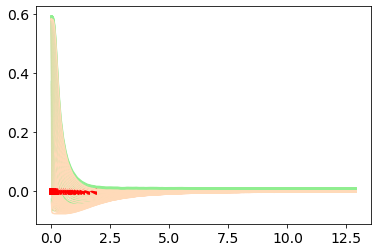

In [40]:
### 7 - c3star vs expc3star - J2 crossing

J2c3starexpc3star = []

TMin_c3starexpc3star = []
TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]<0.09: 
        J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.004,1.8]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 3)), '>', color = "red")
        except:
            TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 3)), '<', color = "red")
        except:
            TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

In [41]:
print("J2c3starexpc3star = ", J2c3starexpc3star)
print("TMin_c3starexpc3star= ",TMin_c3starexpc3star)
print("TMax_c3starexpc3star= ",TMax_c3starexpc3star)

J2c3starexpc3star =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875]
TMin_c3starexpc3star=  [0.00325, 0.017465, 0.034318, 0.051822, 0.06924, 0.087152, 0.103451, 0.121091, 0.137942, 0.155933, 0.173608, 0.191235, 0.21517, 0.234395, 0.252439, 0.270406, 0.283254, 0.293914, 0.312805, 0.334786, 0.35368, 0.436466, 0.52142, 0.611501, 0.694845, 0.797413, 0.890393, 1.01217, 1.139769, 1.270589, 1.446789, 1.745842, 0.00325, 0.00325, 0.00325]
TMax_c3starexpc3star=  [12.9, 0.019828, 0.039325, 0.058838, 0.079258, 0.099086, 0.118999, 0.137433, 0.157781, 0.177858, 0.200455, 0.224248, 0.249165, 0.266906, 0.282478, 0.29765, 0.320329, 0.341511, 0.360625, 0.381542, 0.39677, 0.492046, 0.598131, 0.695219, 0.821539, 0.930856, 1.076265, 1.247815, 1.631795, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


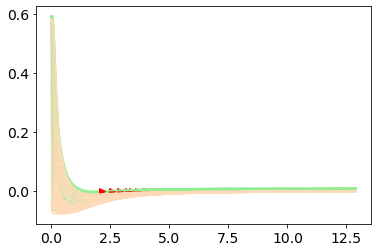

In [42]:
### 7 - c3star vs expc3star - J2 crossing

HT_J2c3starexpc3star = []

HT_TMin_c3starexpc3star = []
HT_TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]<0.065: 
        HT_J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [1.8, 12]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 3)), '>', color = "red")
        except:
            HT_TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT_TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 3)), '<', color = "red")
        except:
            HT_TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))

In [43]:
print("HT_J2c3starexpc3star = ", HT_J2c3starexpc3star)
print("HT_TMin_c3starexpc3star= ",HT_TMin_c3starexpc3star)
print("HT_TMax_c3starexpc3star= ",HT_TMax_c3starexpc3star)

HT_J2c3starexpc3star =  [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06]
HT_TMin_c3starexpc3star=  [4.987764, 4.950716, 4.957775, 4.857074, 4.932452, 4.848712, 4.876683, 4.791781, 4.89258, 4.730657, 4.637375, 4.629887, 4.528575, 4.567947, 4.613748, 4.542676, 4.462787, 4.477638, 4.321158, 4.329792, 4.370105, 4.077787, 3.951276, 3.685495, 3.397862, 3.25404, 2.908956, 2.569374, 2.12305]
HT_TMax_c3starexpc3star=  [12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


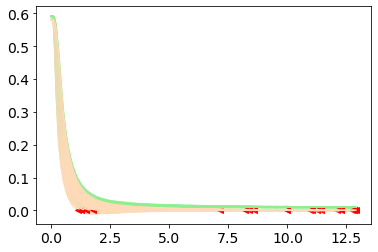

In [44]:
### 7 - c3star vs expc3star - J2 crossing

HT2_J2c3starexpc3star = []

HT2_TMin_c3starexpc3star = []
HT2_TMax_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
for i in range(n):
    
    Diff2Min = t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr)
    Diff2Max = t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr)
    
    #print(all(Diff2Min<0) or all(Diff2Max>0))
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if (not (all(Diff2Min<0) or all(Diff2Max>0))) and J2[i]/J1[i]>0.055: 
        HT2_J2c3starexpc3star.append(round(J2[i], 4))
        
        Diffc3starexpc3starMin = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(temperatures_plots[i][:], 
                               t_h_MeanFc[i][:,0,3]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(temperatures_plots[i][:]), max(temperatures_plots[i][:]), 1000)

           #middle:
        bracket = [0.9, 12.9]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT2_TMax_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 3)), '>', color = "red")
        except:
            HT2_TMax_c3starexpc3star.append(round(max(temperatures_plots[i][:]), 6))

        #max:
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            HT2_TMin_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 3)), '<', color = "red")
        except:
            HT2_TMin_c3starexpc3star.append(round(min(temperatures_plots[i][:]), 6))

In [45]:
print("HT2_J2c3starexpc3star = ", HT2_J2c3starexpc3star)
print("HT2_TMin_c3starexpc3star= ",HT2_TMin_c3starexpc3star)
print("HT2_TMax_c3starexpc3star= ",HT2_TMax_c3starexpc3star)

HT2_J2c3starexpc3star =  [0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.0875, 0.09, 0.0925, 0.095, 0.0975, 0.1, 0.1025, 0.105, 0.1075, 0.11, 0.1125, 0.115, 0.1175, 0.12, 0.125, 0.13]
HT2_TMin_c3starexpc3star=  [1.139769, 1.270589, 1.446783, 1.74582, 7.16075, 8.371257, 8.186683, 8.59558, 11.051307, 9.969106, 11.234445, 10.962209, 11.439194, 9.973793, 12.817337, 12.09363, 12.839559, 0.00325, 12.721863, 12.287223, 12.892061, 0.00325]
HT2_TMax_c3starexpc3star=  [12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9]


In [46]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = None, setylim = None, 
#                                    setxticks = None, setyticks = None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = True, log = True)

In [47]:
#for i in range(3):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [1, 60], setylim = [-0.02, 0.05], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_ZoomLinear.png")

In [48]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [0.01, 60], setylim = [-0.2, 0.05], 
#                                    setxticks = None, setyticks =np.arange(-0.2,0.075,0.025), 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = True)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_ZoomLog.png")

In [49]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 192, setxlim = [7,60], setylim = [-0.002, 0.01], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_Measure.png")

In [50]:
#for i in range(3,n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.BasicPlotsDifferenceFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, t_h_varMeanFc,
#                                    foldername, results_foldername, filenamelist, 
#                                    tmin = 0, tmax = 128, setxlim = [1,60], setylim = [-0.002, 0.01], 
#                                    setxticks = None, setyticks =None, 
#                                    addtitle = addtitle, addsave = addsave,
#                                    save = False, log = False)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelationsDifference"+addsave+"_Measure2.png")

In [51]:
######################################################################
#                   TEMPERATURE SCAN VERSION                          #
######################################################################

In [52]:
ploth = False
tmin = 0
tmax = len(temperatures_plots[0])

In [53]:
#### COMPUTING CORRELATIONS FROM <SISJ> AND <SI> and plotting in 2D
#
#if not ploth:
#    tid = 0
#    hid = 0
#    rid = tid
#else:
#    tid = 0
#    hid = 0
#    rid = hid
#
#[corr, errcorr, maxerr] = af.PrepPlot2DCorrelations(rid, n, 
#                                                t_h_MeanCorr,
#                                                t_h_errCorrEstim,
#                                                t_h_MeanSi,
#                                                hfields_plots,
#                                                temperatures_plots,\
#                                                ploth = ploth)
#print("t = ",temperatures_plots[0][tid])
#print("h = ",hfields_plots[0][hid])

In [54]:
#for i in range(n):
#    addsave = "J2ovJ1" +"={0}".format(J2[i]/J1[i])
#    addtitle = r" $J_2/J_1$={0}".format(J2[i]/J1[i])
#    af.PlotFirstCorrelations(i, L,foldername, results_foldername,  hfields_plots, temperatures_plots,
#                             t_h_MeanCorr, t_h_errCorrEstim, sref, \
#                             distmax = 2, ploth = ploth, plotFirst = True,
#                            t_h_MeanFc = t_h_MeanFc, tmin = tmin, tmax = tmax, 
#                             addtitle = addtitle, addsave = addsave, **kw)

In [55]:
#### Values at Exp. T ####

In [79]:
Tmin = 0
Tmax = 5.75

In [80]:
idTmin = []
idTmax = []

for i in range(n):
    idTmin.append(np.abs(np.array(temperatures_plots[i])-Tmin).argmin())
    idTmax.append(np.abs(np.array(temperatures_plots[i])-Tmax).argmin())

print(idTmin)
print(idTmax)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119]


In [81]:
NN1 = []
ErrNN1 = []
NN2 = []
ErrNN2 = []
NN3par = []
ErrNN3par = []
NN3star = []
ErrNN3star = []
for i in range(n):
    #for idT in range(idTmin, idTmax):
    NN1.append((t_h_MeanFc[i][idTmin[i]:idTmax[i],0,0]+t_h_MeanFc[i][idTmin[i]+1:idTmax[i]+1,0,0])/2)
    ErrNN1.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i],0,0]))
    NN2.append((t_h_MeanFc[i][idTmin[i]:idTmax[i],0,1]+t_h_MeanFc[i][idTmin[i]+1:idTmax[i]+1,0,1])/2)
    ErrNN2.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i],0,1]))
    NN3par.append((t_h_MeanFc[i][idTmin[i]:idTmax[i],0,2]+t_h_MeanFc[i][idTmin[i]+1:idTmax[i]+1,0,2])/2)
    ErrNN3par.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i],0,2]))
    NN3star.append((t_h_MeanFc[i][idTmin[i]:idTmax[i],0,3]+t_h_MeanFc[i][idTmin[i]+1:idTmax[i]+1,0,3])/2)
    ErrNN3star.append(np.sqrt(t_h_varMeanFc[i][idTmin[i]:idTmax[i],0,3]))

NN1 = np.array(NN1).transpose()
ErrNN1 = np.array(ErrNN1).transpose()

NN2 = np.array(NN2).transpose()
ErrNN2 = np.array(ErrNN2).transpose()

NN3par = np.array(NN3par).transpose()
ErrNN3par = np.array(ErrNN3par).transpose()

NN3star = np.array(NN3star).transpose()
ErrNN3star = np.array(ErrNN3star).transpose()

In [82]:
#for idT in range(idTmax[0]-idTmin[0]):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.2f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.275, 0.15])
#    plt.xlim([0,0.15])
#    plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.grid(which = 'both')
#    plt.legend(loc='best')
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_T={:.4f}.png".format(temperatures_plots[0][idTmin[0]+idT]))

In [83]:
#for idT in range(idTmax[0]-idTmin[0]):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([0,0.15],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = r"$c_1$ - exp")
#    plt.fill_between([0,0.15],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = r"$c_2$ - exp")
#    plt.fill_between([0,0.15],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = r"$c_{3 ||}$ - exp")
#    plt.fill_between([0,0.15],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = r"$c_{3 \star}$ - exp")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.35, 0.65])
#    plt.xlim([0,0.13])
#    plt.yticks(np.arange(-0.35, 0.7, 0.05))
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))

In [84]:
### 5 - c2 vs c3|| - J2 crossing

crossing_c2c3par = []
Tcrossing = []
Tfailedcrossing_c2c3par = []
crossing_c2c3parMin = []
TMinCrossing = []
Tfailedcrossing_c2c3parMin = []
crossing_c2c3parMax = []
TMaxCrossing = []
Tfailedcrossing_c2c3parMax = []

for idT in range(idTmax[0]-idTmin[0]):
    Diffc2c3par = interp1d(J2,  NN2[idT,:]-NN3par[idT,:], kind = 'linear')
    Diffc2c3parMin = interp1d(J2, 
                            NN2[idT,:]-NN3par[idT,:]-np.sqrt(ErrNN2[idT,:]+ErrNN3par[idT,:]), kind = 'linear')
    Diffc2c3parMax = interp1d(J2, 
                            NN2[idT,:]-NN3par[idT,:]+np.sqrt(ErrNN2[idT,:]+ErrNN3par[idT,:]), kind = 'linear')
   
    xnew = np.linspace(min(J2), max(J2), 1000)
    
    #plt.figure()
    #plt.plot([min(J2), max(J2)], [0, 0], color = 'orange')
    #plt.plot(J2,  NN2[idT,:]-NN3par[idT,:], 'k.',
    #                 xnew, Diffc2c3par(xnew), '-')
    #
    #plt.fill_between(xnew, Diffc2c3parMin(xnew),Diffc2c3parMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.002, 0.015]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3par, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3par.append(round(solution.root, 6))
        #plt.plot(solution.root, Diffc2c3par(round(solution.root, 3)), 'o', color = "red")
        Tcrossing.append(round(temperatures_plots[0][idT], 4))
    except:
        Tfailedcrossing_c2c3par.append(temperatures_plots[0][idT])
        countfail +=1
    #min:
    #plt.plot(xnew, Diffc2c3parMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3parMin.append(round(solution.root, 6))
        TMinCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3parMin(round(solution.root, 3)), '>', color = "red")
    except:
        Tfailedcrossing_c2c3parMin.append(temperatures_plots[0][idT])
        countfail +=1
        
    #max:
    #plt.plot(xnew, Diffc2c3parMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3parMax.append(round(solution.root, 6))
        TMaxCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3parMax(round(solution.root, 3)), '<', color = "red")
    except:
        Tfailedcrossing_c2c3parMax.append(temperatures_plots[0][idT])
        countfail +=1
    #if countfail == 3:
    #    #plt.ylim([-0.003, 0.003])
    #else:
    #    #plt.ylim([-1, 1])
    #plt.title('T={0}'.format(temperatures_plots[0][idT]))
    #solution = root_scalar(Diffc2c3par, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3par.append(solution.root)
    #plt.plot(solution.root, Diffc2c3par(solution.root), 'o')



In [85]:
print("T_c2c3par = ", Tcrossing)
print("J2_c2c3par = ", crossing_c2c3par)
print("T_c2c3parMin = ", TMinCrossing)
print("J2_c2c3parMin = ", crossing_c2c3parMin)
print("T_c2c3parMax = ", TMaxCrossing)
print("J2_c2c3parMax = ", crossing_c2c3parMax)

T_c2c3par =  [0.1938, 0.2, 0.2992, 0.3984, 0.4977, 0.5969, 0.6961, 0.7953, 0.8945, 0.9938, 1.093, 1.1922, 1.2914, 1.3906, 1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672, 4.4664, 4.5656, 4.6648, 4.7641, 4.8633, 4.9625, 5.0617, 5.1609, 5.2602, 5.3594, 5.4586]
J2_c2c3par =  [0.002, 0.002456, 0.003484, 0.004572, 0.005559, 0.006578, 0.00755, 0.008452, 0.009077, 0.009507, 0.009936, 0.010597, 0.010728, 0.010577, 0.010707, 0.010738, 0.010373, 0.010079, 0.01035, 0.010392, 0.010049, 0.010209, 0.009684, 0.009123, 0.008554, 0.008343, 0.00892, 0.007869, 0.00707, 0.007556, 0.007229, 0.005888, 0.006566, 0.0065, 0.006109, 0.005516, 0.005488, 0.005503, 0.005162, 0.004907, 0.00484, 0.004503, 0.005105, 0.005457, 0.005428, 0.005252, 0.003896, 0.004239, 0.0045, 0.004508, 0.004051, 0.004298, 0.002844, 0.003307, 0.002966]


In [86]:
### 6 - c2 vs c3* - J2 crossing

crossing_c2c3star = []
Tcrossing = []
Tfailedcrossing_c2c3star = []
crossing_c2c3starMin = []
TMinCrossing = []
Tfailedcrossing_c2c3starMin = []
crossing_c2c3starMax = []
TMaxCrossing = []
Tfailedcrossing_c2c3starMax = []

for idT in range(idTmax[0]-idTmin[0]):
    Diffc2c3star = interp1d(J2,  NN2[idT,:]-NN3star[idT,:], kind = 'linear')
    Diffc2c3starMin = interp1d(J2, 
                            NN2[idT,:]-NN3star[idT,:]-np.sqrt(ErrNN2[idT,:]+ErrNN3star[idT,:]), kind = 'linear')
    Diffc2c3starMax = interp1d(J2, 
                            NN2[idT,:]-NN3star[idT,:]+np.sqrt(ErrNN2[idT,:]+ErrNN3star[idT,:]), kind = 'linear')
   
    xnew = np.linspace(min(J2), max(J2), 1000)
    
    #plt.figure()
    #plt.plot([min(J2), max(J2)], [0, 0], color = 'orange')
    #plt.plot(J2,  NN2[idT,:]-NN3star[idT,:], 'k.',
    #                 xnew, Diffc2c3star(xnew), '-')
    #
    #plt.fill_between(xnew, Diffc2c3starMin(xnew),Diffc2c3starMax(xnew), alpha = 0.2, color = 'lightblue')
    
    #middle:
    bracket = [0.0001, 0.125]
    countfail = 0
    try:
        solution = root_scalar(Diffc2c3star, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3star.append(round(solution.root, 6))
        #plt.plot(solution.root, Diffc2c3star(round(solution.root, 3)), 'o', color = "red")
        Tcrossing.append(round(temperatures_plots[0][idT], 4))
    except:
        Tfailedcrossing_c2c3star.append(temperatures_plots[0][idT])
        countfail +=1
    #min:
    #plt.plot(xnew, Diffc2c3starMin(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3starMin.append(round(solution.root, 6))
        TMinCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3starMin(round(solution.root, 3)), '>', color = "red")
    except:
        Tfailedcrossing_c2c3starMin.append(temperatures_plots[0][idT])
        countfail +=1
        
    #max:
    #plt.plot(xnew, Diffc2c3starMax(xnew), '-', color = 'lightblue')
    try:
        solution = root_scalar(Diffc2c3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
        crossing_c2c3starMax.append(round(solution.root, 6))
        TMaxCrossing.append(round(temperatures_plots[0][idT], 4))
        #plt.plot(solution.root, Diffc2c3starMax(round(solution.root, 3)), '<', color = "red")
    except:
        Tfailedcrossing_c2c3starMax.append(temperatures_plots[0][idT])
        countfail +=1
    #if countfail == 3:
    #    #plt.ylim([-0.003, 0.003])
    #else:
    #    #plt.ylim([-1, 1])
    #plt.title('T={0}'.format(temperatures_plots[0][idT]))
    #solution = root_scalar(Diffc2c3star, bracket = [0.1, 2.5], xtol = 1e-5, method = 'bisect')
    #crossing_highT_c2c3star.append(solution.root)
    #plt.plot(solution.root, Diffc2c3star(solution.root), 'o')



In [87]:
print("T_c2c3star = ", Tcrossing)
print("J2_c2c3star = ", crossing_c2c3star)
print("T_c2c3starMin = ", TMinCrossing)
print("J2_c2c3starMin = ", crossing_c2c3starMin)
print("T_c2c3starMax = ", TMaxCrossing)
print("J2_c2c3starMax = ", crossing_c2c3starMax)

T_c2c3star =  [0.0032, 0.0064, 0.0095, 0.0126, 0.0157, 0.0189, 0.022, 0.0251, 0.0282, 0.0314, 0.0345, 0.0376, 0.0407, 0.0438, 0.047, 0.0501, 0.0532, 0.0563, 0.0595, 0.0626, 0.0657, 0.0688, 0.072, 0.0751, 0.0782, 0.0813, 0.0844, 0.0876, 0.0907, 0.0938, 0.0969, 0.1001, 0.1032, 0.1063, 0.1094, 0.1126, 0.1157, 0.1188, 0.1219, 0.125, 0.1282, 0.1313, 0.1344, 0.1375, 0.1407, 0.1438, 0.1469, 0.15, 0.1532, 0.1563, 0.1594, 0.1625, 0.1656, 0.1688, 0.1719, 0.175, 0.1781, 0.1813, 0.1844, 0.1875, 0.1906, 0.1938, 0.1969, 0.2, 0.2992, 0.3984, 0.4977, 0.5969, 0.6961, 0.7953, 0.8945, 0.9938, 1.093, 1.1922, 1.2914, 1.3906, 1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672, 4.4664, 4.5656, 4.6648, 4.7641, 4.8633, 4.9625, 5.0617, 5.1609, 5.2602, 5.3594, 5.4586, 5.5578, 5.657]
J2_c2c3star =  [0.000339, 0.000584, 0.00083, 0.0

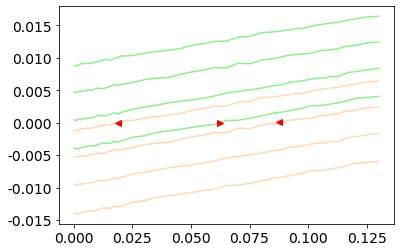

In [88]:
### 7 - c1 vs expc1 - J2 crossing

Tc1expc1 = []

J2Min_c1expc1 = []
J2Max_c1expc1 = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]):
    
    Diff2Min = NN1[idT,:]-(NN1exp-NN1experr)
    Diff2Max = NN1[idT,:]-(NN1exp+NN1experr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        idT
        Tc1expc1.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc1expc1Min = interp1d(J2, 
                               NN1[idT,:]-(NN1exp-NN1experr), kind = 'linear')
        Diffc1expc1Max = interp1d(J2, 
                               NN1[idT,:]-(NN1exp+NN1experr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 1000)

           #middle:
        bracket = [0.0001, 0.12]
        #min:
        plt.plot(xnew, Diffc1expc1Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc1expc1Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Min(round(solution.root, 3)), '>', color = "red")
        except:
            J2Min_c1expc1.append(round(min(J2), 6))

        #max:
        plt.plot(xnew, Diffc1expc1Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc1expc1Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c1expc1.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc1expc1Max(round(solution.root, 3)), '<', color = "red")
        except:
            J2Max_c1expc1.append(round(max(J2), 6))
 

In [89]:
print("Tc1expc1 = ", Tc1expc1)
print("J2Min_c1expc1= ",J2Min_c1expc1)
print("J2Max_c1expc1= ",J2Max_c1expc1)

Tc1expc1 =  [2.8789, 2.9781, 3.0773, 3.1766]
J2Min_c1expc1=  [0.062284, 0.0001, 0.0001, 0.0001]
J2Max_c1expc1=  [0.13, 0.13, 0.087562, 0.01901]


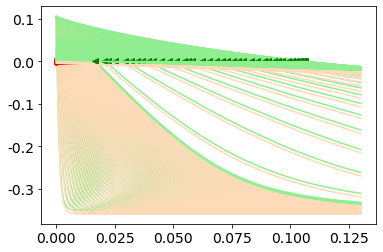

In [90]:
### 8 - c2 vs expc2 - J2 crossing
Tc2expc2 = []

J2Min_c2expc2 = []
J2Max_c2expc2 = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]):
    
    Diff2Min = NN2[idT,:]-(NN2exp-NN2experr)
    Diff2Max = NN2[idT,:]-(NN2exp+NN2experr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc2expc2.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc2expc2Min = interp1d(J2, 
                               NN2[idT,:]-(NN2exp-NN2experr), kind = 'linear')
        Diffc2expc2Max = interp1d(J2, 
                               NN2[idT,:]-(NN2exp+NN2experr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 1000)

        #middle:
        bracket = [0.0001, 0.12]
        #min:
        plt.plot(xnew, Diffc2expc2Min(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc2expc2Min, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Min(round(solution.root, 6)), '<', color = "green")
        except:
            J2Max_c2expc2.append(round(max(J2), 6))

        #max:
        plt.plot(xnew, Diffc2expc2Max(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc2expc2Max, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c2expc2.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc2expc2Max(round(solution.root, 6)), '>', color = "red")
        except:
            J2Min_c2expc2.append(round(min(J2), 6))
 

In [91]:
len(J2Min_c2expc2)
len(J2Max_c2expc2)

119

In [92]:
print("Tc2expc2 = ", Tc2expc2)
print("J2Min_c2expc2= ",J2Min_c2expc2)
print("J2Max_c2expc2= ",J2Max_c2expc2)

Tc2expc2 =  [0.0032, 0.0064, 0.0095, 0.0126, 0.0157, 0.0189, 0.022, 0.0251, 0.0282, 0.0314, 0.0345, 0.0376, 0.0407, 0.0438, 0.047, 0.0501, 0.0532, 0.0563, 0.0595, 0.0626, 0.0657, 0.0688, 0.072, 0.0751, 0.0782, 0.0813, 0.0844, 0.0876, 0.0907, 0.0938, 0.0969, 0.1001, 0.1032, 0.1063, 0.1094, 0.1126, 0.1157, 0.1188, 0.1219, 0.125, 0.1282, 0.1313, 0.1344, 0.1375, 0.1407, 0.1438, 0.1469, 0.15, 0.1532, 0.1563, 0.1594, 0.1625, 0.1656, 0.1688, 0.1719, 0.175, 0.1781, 0.1813, 0.1844, 0.1875, 0.1906, 0.1938, 0.1969, 0.2, 0.2992, 0.3984, 0.4977, 0.5969, 0.6961, 0.7953, 0.8945, 0.9938, 1.093, 1.1922, 1.2914, 1.3906, 1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672, 4.4664, 4.5656, 4.6648, 4.7641, 4.8633, 4.9625, 5.0617, 5.1609, 5.2602, 5.3594, 5.4586, 5.5578, 5.657]
J2Min_c2expc2=  [0.000373, 0.000623, 0.00088, 0.00

In [93]:
max(J2)

0.13

(0, 0.13)

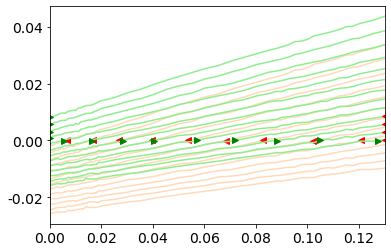

In [94]:
### 9 - c3// vs expc3// - J2 crossing

Tc3parexpc3par = []

J2Min_c3parexpc3par = []
J2Max_c3parexpc3par = []
Diff2MinTest = []
Diff2MaxTest = []
for idT in range(idTmax[0]-idTmin[0]):
    
    Diff2Min = NN3par[idT,:]-(NN3pexp-NN3pexperr)
    Diff2Max = NN3par[idT,:]-(NN3pexp+NN3pexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc3parexpc3par.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc3parexpc3parMin = interp1d(J2, 
                               NN3par[idT,:]-(NN3pexp-NN3pexperr), kind = 'linear')
        Diffc3parexpc3parMax = interp1d(J2, 
                               NN3par[idT,:]-(NN3pexp+NN3pexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 1000)

           #middle:
        bracket = [0.0001, 0.13]
        #min:
        plt.plot(xnew, Diffc3parexpc3parMin(xnew), '-', color = 'lightgreen')
        try:
            solution = root_scalar(Diffc3parexpc3parMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMin(round(solution.root, 3)), '>', color = "green")
        except:
            J2Min_c3parexpc3par.append(round(min(J2), 6))
            plt.plot(round(min(J2),6), Diffc3parexpc3parMin(round(min(J2), 6)), '>', color = "green")

        #max:
        plt.plot(xnew, Diffc3parexpc3parMax(xnew), '-', color = 'peachpuff')
        try:
            solution = root_scalar(Diffc3parexpc3parMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c3parexpc3par.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3parexpc3parMax(round(solution.root, 3)), '<', color = "red")
        except:
            J2Max_c3parexpc3par.append(round(max(J2), 6))
            plt.plot(round(max(J2),6), Diffc3parexpc3parMin(round(max(J2), 6)), '<', color = "red")
            
plt.xlim([0,0.13])
 

In [95]:
print("Tc3parexpc3par = ", Tc3parexpc3par)
print("J2Min_c3parexpc3par= ",J2Min_c3parexpc3par)
print("J2Max_c3parexpc3par= ",J2Max_c3parexpc3par)

Tc3parexpc3par =  [2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375]
J2Min_c3parexpc3par=  [0.0001, 0.0001, 0.0001, 0.0001, 0.005399, 0.016144, 0.02841, 0.040437, 0.056996, 0.071764, 0.08834, 0.104858, 0.127434]
J2Max_c3parexpc3par=  [0.006684, 0.016817, 0.026924, 0.0395, 0.053725, 0.06832, 0.082857, 0.102233, 0.120799, 0.13, 0.13, 0.13, 0.13]


(0.075, 0.082)

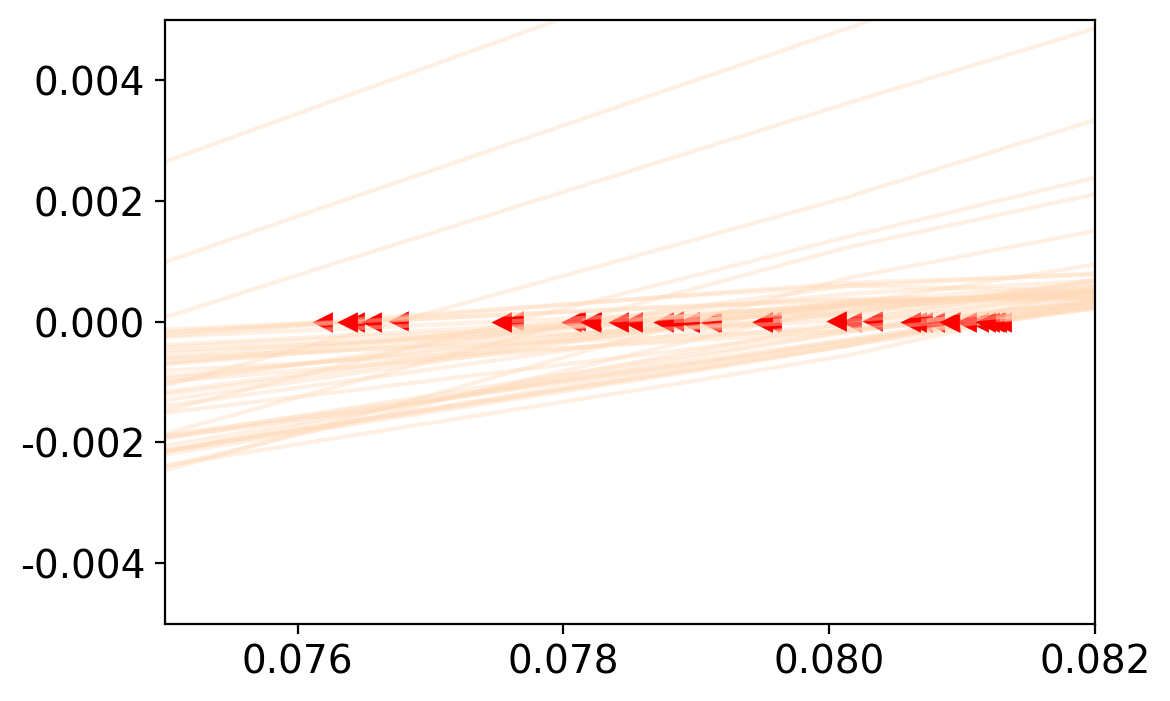

In [96]:
### 10 - c3* vs expc3* - J2 crossing
Tc3starexpc3star = []

J2Min_c3starexpc3star = []
J2Max_c3starexpc3star = []
Diff2MinTest = []
Diff2MaxTest = []
plt.figure(dpi=200)
for idT in range(idTmax[0]-idTmin[0]):
    
    Diff2Min = NN3star[idT,:]-(NN3sexp-NN3sexperr)
    Diff2Max = NN3star[idT,:]-(NN3sexp+NN3sexperr)
    
    Diff2MinTest.append(all(Diff2Min<0))
    Diff2MaxTest.append(all(Diff2Min>0))
    if not (all(Diff2Min<0) or all(Diff2Max>0)):
        Tc3starexpc3star.append(round(temperatures_plots[0][idT+idTmin[0]], 4))
        
        Diffc3starexpc3starMin = interp1d(J2, 
                               NN3star[idT,:]-(NN3sexp-NN3sexperr), kind = 'linear')
        Diffc3starexpc3starMax = interp1d(J2, 
                               NN3star[idT,:]-(NN3sexp+NN3sexperr), kind = 'linear')

        xnew = np.linspace(min(J2), max(J2), 100)

           #middle:
        bracket = [0.0001, 0.13]
        #min:
        plt.plot(xnew, Diffc3starexpc3starMin(xnew), '-', color = 'lightgreen', alpha = 0.4)
        try:
            solution = root_scalar(Diffc3starexpc3starMin, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Min_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMin(round(solution.root, 6)), '>', color = "green")
        except:    
            J2Min_c3starexpc3star.append(round(min(J2), 6))
            
        plt.plot(xnew, Diffc3starexpc3starMax(xnew), '-', color = 'peachpuff',alpha = 0.4)
        try:
            solution = root_scalar(Diffc3starexpc3starMax, bracket = bracket, xtol = 1e-4)#, method = 'bisect')
            J2Max_c3starexpc3star.append(round(solution.root, 6))
            plt.plot(solution.root, Diffc3starexpc3starMax(round(solution.root, 6)), '<', color = "red")
        except:
            J2Max_c3starexpc3star.append(round(max(J2), 6))

plt.ylim([-0.005, 0.005])
plt.xlim([0.075, 0.082])

In [97]:
len(J2Max_c3starexpc3star)

119

In [98]:
print("Tc3starexpc3star = ", Tc3starexpc3star)
print("J2Min_c3starexpc3star= ",J2Min_c3starexpc3star)
print("J2Max_c3starexpc3star= ",J2Max_c3starexpc3star)

Tc3starexpc3star =  [0.0032, 0.0064, 0.0095, 0.0126, 0.0157, 0.0189, 0.022, 0.0251, 0.0282, 0.0314, 0.0345, 0.0376, 0.0407, 0.0438, 0.047, 0.0501, 0.0532, 0.0563, 0.0595, 0.0626, 0.0657, 0.0688, 0.072, 0.0751, 0.0782, 0.0813, 0.0844, 0.0876, 0.0907, 0.0938, 0.0969, 0.1001, 0.1032, 0.1063, 0.1094, 0.1126, 0.1157, 0.1188, 0.1219, 0.125, 0.1282, 0.1313, 0.1344, 0.1375, 0.1407, 0.1438, 0.1469, 0.15, 0.1532, 0.1563, 0.1594, 0.1625, 0.1656, 0.1688, 0.1719, 0.175, 0.1781, 0.1813, 0.1844, 0.1875, 0.1906, 0.1938, 0.1969, 0.2, 0.2992, 0.3984, 0.4977, 0.5969, 0.6961, 0.7953, 0.8945, 0.9938, 1.093, 1.1922, 1.2914, 1.3906, 1.4898, 1.5891, 1.6883, 1.7875, 1.8867, 1.9859, 2.0852, 2.1844, 2.2836, 2.3828, 2.482, 2.5813, 2.6805, 2.7797, 2.8789, 2.9781, 3.0773, 3.1766, 3.2758, 3.375, 3.4742, 3.5734, 3.6727, 3.7719, 3.8711, 3.9703, 4.0695, 4.1688, 4.268, 4.3672, 4.4664, 4.5656, 4.6648, 4.7641, 4.8633, 4.9625, 5.0617, 5.1609, 5.2602, 5.3594, 5.4586, 5.5578, 5.657]
J2Min_c3starexpc3star=  [0.000211, 0.00037

In [99]:
#for idT in range(idTmax[0]-idTmin[0],4):
#    plt.figure(figsize=(11,9), dpi = 200)
#    plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:],fmt='x',yerr = ErrNN2[idT,:], label = r"$c_2$")
#    plt.errorbar(J2, NN3par[idT,:],fmt='v', yerr = ErrNN3par[idT,:], label = r"$c_{3 ||}$")
#    plt.errorbar(J2, NN3star[idT,:],fmt='*',yerr = ErrNN3star[idT,:], label = r"$c_{3\star}$")
#    plt.gca().set_prop_cycle(None)
#    plt.fill_between([0,0.15],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = 'NN1 - exp')
#    plt.fill_between([0,0.15],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2, label = 'NN2 - exp')
#    plt.fill_between([0,0.15],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2, label = 'NN3par - exp')
#    plt.fill_between([0,0.15],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2, label = 'NN3star - exp')
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.2f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.ylim([-0.275, 0.15])
#    plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.xscale('log')
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/LogFirstCorrelations_T={:.2f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))
#    plt.show()

In [100]:
#for idT in range(0, idTmax[0]-idTmin[0], 2):
#    plt.figure(figsize=(11,9), dpi = 200)
#    #plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:]-NN3par[idT,:],fmt='.', color = '#AB8C1A', yerr = ErrNN2[idT,:], label = r"$c_2 - c_{3 ||}$")
#    plt.errorbar(J2, NN2[idT,:]-NN3star[idT,:],fmt='.',color = '#EB531B',yerr = ErrNN3star[idT,:], label = r"$c_2 - c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    #plt.ylim([-0.275, 0.15])
#    #plt.xlim([0,0.15])
#    #plt.yticks(np.arange(-0.275, 0.1525, 0.025))
#    plt.xscale('log')
#    plt.grid(which = 'both')
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/LogDiffFirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))

In [101]:
#for idT in range(0, idTmax[0]-idTmin[0], 2):
#    plt.figure(figsize=(11,9), dpi = 200)
#    #plt.errorbar(J2, NN1[idT,:],fmt='.', yerr = ErrNN1[idT,:], label = r"$c_1$")
#    plt.errorbar(J2, NN2[idT,:]-NN3par[idT,:],fmt='.', color = '#AB8C1A', yerr = ErrNN2[idT,:], label = r"$c_2 - c_{3 ||}$")
#    plt.errorbar(J2, NN2[idT,:]-NN3star[idT,:],fmt='.',color = '#EB531B',yerr = ErrNN3star[idT,:], label = r"$c_2 - c_{3\star}$")
#    plt.xlabel(r'$J_2/J_1$')
#    plt.ylabel(r'$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$')
#    plt.title(r'$T/J_1$ = {:.4f}'.format(temperatures_plots[0][idTmin[0]+idT]))
#    plt.grid(which = 'both')
#    plt.xticks(np.arange(0, 0.15, 0.01))
#    plt.legend(loc='upper center', ncol = 4)
#    plt.savefig("./" + foldername + results_foldername + "/DiffFirstCorrelations_T={:.4f}".format(temperatures_plots[0][idTmin[0]+idT])+"_rmexpmag={0}.png".format(rmexpmag))